In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from util import *
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import math
matplotlib.rcParams['figure.figsize'] = [12, 8]

In [2]:
raw_data = pd.read_csv("raw_data_new.csv", parse_dates=[0], index_col=0)
raw_data

,pm25,t2m,d2m,u10,v10,sp,t500,t850,t1000,q500,...,q1000,u500,u850,u1000,v500,v850,v1000,w500,w850,w1000
2014-01-01 08:00:00,51.0,270.487368,258.980250,2.507680,-0.658156,97997.728951,248.554676,270.020533,276.617789,0.000131,...,0.001265,23.046411,10.548611,3.180156,-20.240968,-9.274819,-0.819754,-0.362159,0.270265,0.257394
2014-01-01 14:00:00,23.0,283.838611,258.241520,3.154037,-0.050984,98048.881796,249.264215,270.571515,282.831868,0.000194,...,0.001557,23.175371,8.060430,3.081539,-16.076533,-5.246438,0.187835,-0.213867,0.326162,0.170515
2014-01-01 20:00:00,66.0,273.009328,261.723400,1.842218,-1.248453,98354.616140,248.722481,271.406578,282.505506,0.000195,...,0.001777,23.576161,6.588762,1.987903,-10.424377,-6.522191,-1.084960,-0.113473,0.107447,0.193131
2014-01-02 02:00:00,127.0,270.101179,262.794066,0.369782,-1.550008,98568.984998,248.943138,271.072288,278.768867,0.000185,...,0.001637,18.130736,5.157552,0.032000,-7.689495,-0.974540,-2.949295,0.033899,-0.050130,0.173733
2014-01-02 08:00:00,119.0,268.554291,262.665035,0.382165,-1.082520,98565.141143,248.187354,271.501711,275.817080,0.000187,...,0.001611,17.444210,7.410570,0.221648,-2.653525,2.969054,-1.754386,0.091726,-0.135630,0.127581
2014-01-02 14:00:00,108.0,281.021141,262.805886,1.372043,0.864305,98220.376883,249.590576,273.640898,279.917078,0.000165,...,0.001549,22.720216,8.290536,1.422752,-4.169837,1.569078,0.806979,0.041438,0.067731,0.040518
2014-01-02 20:00:00,168.0,274.254307,263.928755,1.946937,-1.228454,98300.802165,249.183615,272.620853,281.459036,0.000551,...,0.001680,17.466968,6.941507,2.047326,-1.737625,-6.505430,-1.026792,-0.127448,0.222734,0.176215
2014-01-03 02:00:00,122.0,273.074404,262.622681,1.463319,-2.884348,98494.769021,247.280942,271.582311,278.024974,0.000362,...,0.001649,15.818295,2.872926,2.037211,-3.809984,-11.719848,-4.760390,-0.027514,0.467191,0.325794
2014-01-03 08:00:00,30.0,270.140652,260.127744,0.696676,-2.797163,98825.044903,245.507756,269.041449,273.967259,0.000186,...,0.001449,9.958174,-4.042902,1.067478,-8.480185,-10.603811,-4.742644,0.099449,0.074810,0.313658
2014-01-03 14:00:00,16.0,280.057803,259.841117,0.031922,-1.408137,98795.476785,245.383553,267.792819,278.764903,0.000231,...,0.001501,8.070545,0.350609,0.160961,-9.105245,-4.878698,-1.426081,0.152680,-0.017033,0.089704


In [3]:
# Setting parameters
# specify the number of lag hours, 用前lag_hours来预测后predict_hours
lag_hours = 10
predict_hours = 3
n_features = 21

In [4]:
# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(raw_data)
reframed = series_to_supervised(scaled, lag_hours, predict_hours)

In [5]:
# Turn off shuffle, because it's a sequense model!!!
train, test = train_test_split(reframed.values, train_size=0.8, test_size=0.2, shuffle=False)
train_X = train[:, :n_features*lag_hours]

# select the pm25 data we want to predict
pm25_select = []
for i in range(predict_hours , 0, -1):
    pm25_select.append(-n_features * i)
    
train_y = train[:, pm25_select]
test_X = test[:, :n_features*lag_hours]
test_y = test[:, pm25_select]

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(4380, 210) (4380, 3) (1096, 210) (1096, 3)


In [6]:
train_X = train_X.reshape(train_X.shape[0], lag_hours, 21)
test_X = test_X.reshape(test_X.shape[0], lag_hours, 21)

# LSTM using Keras

In [ ]:
# design network
model1 = Sequential()
model1.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model1.add(Dense(predict_hours))
model1.compile(loss='mae', optimizer='adam')
# fit network
history = model1.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)


In [ ]:
ypredict = model.predict(test_X)

In [14]:
pm25_predict = inv_normalization(scaler, ypredict, predict_hours)
pm25_actual = inv_normalization(scaler, test_y, predict_hours)

In [11]:
for i in range(predict_hours):
    print("predict_hours " + str(i))
    print("mae:")
    print(mean_absolute_error(pm25_predict[:, i], pm25_actual[:, i]))
    print("rmse:")
    print(math.sqrt(mean_squared_error(pm25_predict[:, i], pm25_actual[:, i])))

predict_hours 0
mae:
20.432814783460874
rmse:
34.53821045341537
predict_hours 1
mae:
26.918406097014454
rmse:
43.08356800075191
predict_hours 2
mae:
30.87214096505059
rmse:
48.47983423675518


In [ ]:
# Plot for LSTM
for i in range(predict_hours):
    plt.subplot(predict_hours, 1, i+1)
    plt.plot(pm25_predict[-200:, i], '-', label = 'pm25 predicted')
    plt.plot(pm25_actual[-200:, i], '-', label = 'pm25 actual')
    plt.legend()
    plt.title('Predict time '+ str(i))
    plt.show()

In [12]:
# Select for best hidden size
hidden_size = [50, 60, 70, 80, 90, 100]

mae = np.zeros((6, 10, 3))
rmse = np.zeros((6, 10, 3))
mape = np.zeros((6, 10, 3))

for i in range(6):
    for t in range(10):
        print("Times: {t:5d}".format(t=t))
        # design network
        model1 = Sequential()
        model1.add(LSTM(hidden_size[i], input_shape=(train_X.shape[1], train_X.shape[2])))
        model1.add(Dense(predict_hours))
        model1.compile(loss='mae', optimizer='adam')
        # fit network
        history = model1.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

        ypredict = model1.predict(test_X)
        pm25_predict = inv_normalization(scaler, ypredict, predict_hours)
        pm25_actual = inv_normalization(scaler, test_y, predict_hours)

        for j in range(predict_hours):
            mae[i, t, j] = mean_absolute_error(pm25_predict[:, j], pm25_actual[:, j])
            rmse[i, t, j] = math.sqrt(mean_squared_error(pm25_predict[:, j], pm25_actual[:, j]))
            mape[i, t, j] = mean_absolute_percentage_error(pm25_predict[:, j], pm25_actual[:, j])

Times:     0
Train on 4380 samples, validate on 1096 samples
Epoch 1/100
 - 3s - loss: 0.1182 - val_loss: 0.0744
Epoch 2/100
 - 1s - loss: 0.0901 - val_loss: 0.1004
Epoch 3/100
 - 1s - loss: 0.0874 - val_loss: 0.0578
Epoch 4/100
 - 1s - loss: 0.0784 - val_loss: 0.0697
Epoch 5/100
 - 1s - loss: 0.0756 - val_loss: 0.0499
Epoch 6/100
 - 1s - loss: 0.0707 - val_loss: 0.0556
Epoch 7/100
 - 1s - loss: 0.0696 - val_loss: 0.0504
Epoch 8/100
 - 1s - loss: 0.0682 - val_loss: 0.0741
Epoch 9/100
 - 1s - loss: 0.0754 - val_loss: 0.0594
Epoch 10/100
 - 1s - loss: 0.0720 - val_loss: 0.0593
Epoch 11/100
 - 1s - loss: 0.0674 - val_loss: 0.0484
Epoch 12/100
 - 1s - loss: 0.0657 - val_loss: 0.0457
Epoch 13/100
 - 1s - loss: 0.0673 - val_loss: 0.0454
Epoch 14/100
 - 1s - loss: 0.0661 - val_loss: 0.0563
Epoch 15/100
 - 1s - loss: 0.0668 - val_loss: 0.0528
Epoch 16/100
 - 1s - loss: 0.0652 - val_loss: 0.0458
Epoch 17/100
 - 1s - loss: 0.0629 - val_loss: 0.0444
Epoch 18/100
 - 1s - loss: 0.0625 - val_loss: 0

Epoch 54/100
 - 1s - loss: 0.0569 - val_loss: 0.0401
Epoch 55/100
 - 1s - loss: 0.0564 - val_loss: 0.0384
Epoch 56/100
 - 1s - loss: 0.0562 - val_loss: 0.0411
Epoch 57/100
 - 1s - loss: 0.0562 - val_loss: 0.0413
Epoch 58/100
 - 1s - loss: 0.0559 - val_loss: 0.0402
Epoch 59/100
 - 1s - loss: 0.0559 - val_loss: 0.0384
Epoch 60/100
 - 1s - loss: 0.0560 - val_loss: 0.0373
Epoch 61/100
 - 1s - loss: 0.0558 - val_loss: 0.0397
Epoch 62/100
 - 1s - loss: 0.0557 - val_loss: 0.0473
Epoch 63/100
 - 1s - loss: 0.0571 - val_loss: 0.0402
Epoch 64/100
 - 1s - loss: 0.0557 - val_loss: 0.0369
Epoch 65/100
 - 1s - loss: 0.0554 - val_loss: 0.0404
Epoch 66/100
 - 1s - loss: 0.0550 - val_loss: 0.0399
Epoch 67/100
 - 1s - loss: 0.0555 - val_loss: 0.0396
Epoch 68/100
 - 1s - loss: 0.0553 - val_loss: 0.0397
Epoch 69/100
 - 1s - loss: 0.0551 - val_loss: 0.0390
Epoch 70/100
 - 1s - loss: 0.0551 - val_loss: 0.0399
Epoch 71/100
 - 1s - loss: 0.0550 - val_loss: 0.0395
Epoch 72/100
 - 1s - loss: 0.0549 - val_loss: 

Epoch 7/100
 - 1s - loss: 0.0689 - val_loss: 0.0527
Epoch 8/100
 - 1s - loss: 0.0674 - val_loss: 0.0674
Epoch 9/100
 - 1s - loss: 0.0732 - val_loss: 0.0497
Epoch 10/100
 - 1s - loss: 0.0702 - val_loss: 0.0495
Epoch 11/100
 - 1s - loss: 0.0675 - val_loss: 0.0540
Epoch 12/100
 - 1s - loss: 0.0668 - val_loss: 0.0541
Epoch 13/100
 - 1s - loss: 0.0654 - val_loss: 0.0435
Epoch 14/100
 - 1s - loss: 0.0630 - val_loss: 0.0456
Epoch 15/100
 - 1s - loss: 0.0632 - val_loss: 0.0429
Epoch 16/100
 - 1s - loss: 0.0652 - val_loss: 0.0403
Epoch 17/100
 - 1s - loss: 0.0635 - val_loss: 0.0730
Epoch 18/100
 - 1s - loss: 0.0696 - val_loss: 0.0429
Epoch 19/100
 - 1s - loss: 0.0642 - val_loss: 0.0601
Epoch 20/100
 - 1s - loss: 0.0645 - val_loss: 0.0421
Epoch 21/100
 - 1s - loss: 0.0610 - val_loss: 0.0449
Epoch 22/100
 - 1s - loss: 0.0607 - val_loss: 0.0498
Epoch 23/100
 - 1s - loss: 0.0626 - val_loss: 0.0460
Epoch 24/100
 - 1s - loss: 0.0608 - val_loss: 0.0406
Epoch 25/100
 - 1s - loss: 0.0626 - val_loss: 0.0

Epoch 61/100
 - 1s - loss: 0.0556 - val_loss: 0.0404
Epoch 62/100
 - 1s - loss: 0.0557 - val_loss: 0.0451
Epoch 63/100
 - 1s - loss: 0.0568 - val_loss: 0.0380
Epoch 64/100
 - 1s - loss: 0.0562 - val_loss: 0.0368
Epoch 65/100
 - 1s - loss: 0.0562 - val_loss: 0.0424
Epoch 66/100
 - 1s - loss: 0.0559 - val_loss: 0.0393
Epoch 67/100
 - 1s - loss: 0.0552 - val_loss: 0.0366
Epoch 68/100
 - 1s - loss: 0.0556 - val_loss: 0.0384
Epoch 69/100
 - 1s - loss: 0.0548 - val_loss: 0.0418
Epoch 70/100
 - 1s - loss: 0.0553 - val_loss: 0.0368
Epoch 71/100
 - 1s - loss: 0.0554 - val_loss: 0.0365
Epoch 72/100
 - 1s - loss: 0.0554 - val_loss: 0.0420
Epoch 73/100
 - 1s - loss: 0.0554 - val_loss: 0.0405
Epoch 74/100
 - 1s - loss: 0.0551 - val_loss: 0.0370
Epoch 75/100
 - 1s - loss: 0.0557 - val_loss: 0.0378
Epoch 76/100
 - 1s - loss: 0.0547 - val_loss: 0.0428
Epoch 77/100
 - 1s - loss: 0.0550 - val_loss: 0.0364
Epoch 78/100
 - 1s - loss: 0.0551 - val_loss: 0.0366
Epoch 79/100
 - 1s - loss: 0.0547 - val_loss: 

Epoch 14/100
 - 1s - loss: 0.0652 - val_loss: 0.0473
Epoch 15/100
 - 1s - loss: 0.0632 - val_loss: 0.0431
Epoch 16/100
 - 1s - loss: 0.0624 - val_loss: 0.0565
Epoch 17/100
 - 1s - loss: 0.0677 - val_loss: 0.0472
Epoch 18/100
 - 1s - loss: 0.0647 - val_loss: 0.0413
Epoch 19/100
 - 1s - loss: 0.0632 - val_loss: 0.0456
Epoch 20/100
 - 1s - loss: 0.0609 - val_loss: 0.0410
Epoch 21/100
 - 1s - loss: 0.0605 - val_loss: 0.0398
Epoch 22/100
 - 1s - loss: 0.0631 - val_loss: 0.0390
Epoch 23/100
 - 1s - loss: 0.0622 - val_loss: 0.0517
Epoch 24/100
 - 1s - loss: 0.0624 - val_loss: 0.0415
Epoch 25/100
 - 1s - loss: 0.0601 - val_loss: 0.0404
Epoch 26/100
 - 1s - loss: 0.0614 - val_loss: 0.0385
Epoch 27/100
 - 1s - loss: 0.0598 - val_loss: 0.0449
Epoch 28/100
 - 1s - loss: 0.0605 - val_loss: 0.0433
Epoch 29/100
 - 1s - loss: 0.0597 - val_loss: 0.0443
Epoch 30/100
 - 1s - loss: 0.0610 - val_loss: 0.0395
Epoch 31/100
 - 1s - loss: 0.0613 - val_loss: 0.0424
Epoch 32/100
 - 1s - loss: 0.0598 - val_loss: 

Epoch 68/100
 - 1s - loss: 0.0552 - val_loss: 0.0395
Epoch 69/100
 - 1s - loss: 0.0549 - val_loss: 0.0434
Epoch 70/100
 - 1s - loss: 0.0553 - val_loss: 0.0383
Epoch 71/100
 - 1s - loss: 0.0552 - val_loss: 0.0357
Epoch 72/100
 - 1s - loss: 0.0554 - val_loss: 0.0410
Epoch 73/100
 - 1s - loss: 0.0548 - val_loss: 0.0404
Epoch 74/100
 - 1s - loss: 0.0548 - val_loss: 0.0387
Epoch 75/100
 - 1s - loss: 0.0544 - val_loss: 0.0376
Epoch 76/100
 - 1s - loss: 0.0551 - val_loss: 0.0412
Epoch 77/100
 - 1s - loss: 0.0545 - val_loss: 0.0392
Epoch 78/100
 - 1s - loss: 0.0541 - val_loss: 0.0366
Epoch 79/100
 - 1s - loss: 0.0545 - val_loss: 0.0391
Epoch 80/100
 - 1s - loss: 0.0541 - val_loss: 0.0404
Epoch 81/100
 - 1s - loss: 0.0541 - val_loss: 0.0377
Epoch 82/100
 - 1s - loss: 0.0540 - val_loss: 0.0367
Epoch 83/100
 - 1s - loss: 0.0539 - val_loss: 0.0386
Epoch 84/100
 - 1s - loss: 0.0538 - val_loss: 0.0434
Epoch 85/100
 - 1s - loss: 0.0543 - val_loss: 0.0394
Epoch 86/100
 - 1s - loss: 0.0538 - val_loss: 

Epoch 21/100
 - 1s - loss: 0.0627 - val_loss: 0.0406
Epoch 22/100
 - 1s - loss: 0.0621 - val_loss: 0.0450
Epoch 23/100
 - 1s - loss: 0.0616 - val_loss: 0.0535
Epoch 24/100
 - 1s - loss: 0.0632 - val_loss: 0.0407
Epoch 25/100
 - 1s - loss: 0.0616 - val_loss: 0.0386
Epoch 26/100
 - 1s - loss: 0.0611 - val_loss: 0.0460
Epoch 27/100
 - 1s - loss: 0.0617 - val_loss: 0.0474
Epoch 28/100
 - 1s - loss: 0.0606 - val_loss: 0.0388
Epoch 29/100
 - 1s - loss: 0.0607 - val_loss: 0.0380
Epoch 30/100
 - 1s - loss: 0.0599 - val_loss: 0.0449
Epoch 31/100
 - 1s - loss: 0.0610 - val_loss: 0.0465
Epoch 32/100
 - 1s - loss: 0.0602 - val_loss: 0.0418
Epoch 33/100
 - 1s - loss: 0.0600 - val_loss: 0.0375
Epoch 34/100
 - 1s - loss: 0.0606 - val_loss: 0.0430
Epoch 35/100
 - 1s - loss: 0.0603 - val_loss: 0.0485
Epoch 36/100
 - 1s - loss: 0.0603 - val_loss: 0.0414
Epoch 37/100
 - 1s - loss: 0.0587 - val_loss: 0.0371
Epoch 38/100
 - 1s - loss: 0.0598 - val_loss: 0.0385
Epoch 39/100
 - 1s - loss: 0.0586 - val_loss: 

Epoch 75/100
 - 1s - loss: 0.0543 - val_loss: 0.0419
Epoch 76/100
 - 1s - loss: 0.0546 - val_loss: 0.0399
Epoch 77/100
 - 1s - loss: 0.0540 - val_loss: 0.0363
Epoch 78/100
 - 1s - loss: 0.0545 - val_loss: 0.0369
Epoch 79/100
 - 1s - loss: 0.0537 - val_loss: 0.0385
Epoch 80/100
 - 1s - loss: 0.0541 - val_loss: 0.0417
Epoch 81/100
 - 1s - loss: 0.0548 - val_loss: 0.0371
Epoch 82/100
 - 1s - loss: 0.0537 - val_loss: 0.0373
Epoch 83/100
 - 1s - loss: 0.0537 - val_loss: 0.0366
Epoch 84/100
 - 1s - loss: 0.0532 - val_loss: 0.0375
Epoch 85/100
 - 1s - loss: 0.0533 - val_loss: 0.0381
Epoch 86/100
 - 1s - loss: 0.0534 - val_loss: 0.0394
Epoch 87/100
 - 1s - loss: 0.0538 - val_loss: 0.0399
Epoch 88/100
 - 1s - loss: 0.0538 - val_loss: 0.0383
Epoch 89/100
 - 1s - loss: 0.0536 - val_loss: 0.0367
Epoch 90/100
 - 1s - loss: 0.0542 - val_loss: 0.0363
Epoch 91/100
 - 1s - loss: 0.0531 - val_loss: 0.0383
Epoch 92/100
 - 1s - loss: 0.0532 - val_loss: 0.0420
Epoch 93/100
 - 1s - loss: 0.0550 - val_loss: 

Epoch 28/100
 - 1s - loss: 0.0590 - val_loss: 0.0534
Epoch 29/100
 - 1s - loss: 0.0605 - val_loss: 0.0394
Epoch 30/100
 - 1s - loss: 0.0595 - val_loss: 0.0375
Epoch 31/100
 - 1s - loss: 0.0582 - val_loss: 0.0391
Epoch 32/100
 - 1s - loss: 0.0575 - val_loss: 0.0406
Epoch 33/100
 - 1s - loss: 0.0576 - val_loss: 0.0470
Epoch 34/100
 - 1s - loss: 0.0589 - val_loss: 0.0436
Epoch 35/100
 - 1s - loss: 0.0578 - val_loss: 0.0370
Epoch 36/100
 - 1s - loss: 0.0582 - val_loss: 0.0380
Epoch 37/100
 - 1s - loss: 0.0569 - val_loss: 0.0454
Epoch 38/100
 - 1s - loss: 0.0579 - val_loss: 0.0429
Epoch 39/100
 - 1s - loss: 0.0570 - val_loss: 0.0384
Epoch 40/100
 - 1s - loss: 0.0577 - val_loss: 0.0383
Epoch 41/100
 - 1s - loss: 0.0568 - val_loss: 0.0440
Epoch 42/100
 - 1s - loss: 0.0576 - val_loss: 0.0409
Epoch 43/100
 - 1s - loss: 0.0570 - val_loss: 0.0378
Epoch 44/100
 - 1s - loss: 0.0565 - val_loss: 0.0383
Epoch 45/100
 - 1s - loss: 0.0563 - val_loss: 0.0393
Epoch 46/100
 - 1s - loss: 0.0559 - val_loss: 

Epoch 82/100
 - 1s - loss: 0.0537 - val_loss: 0.0388
Epoch 83/100
 - 1s - loss: 0.0542 - val_loss: 0.0372
Epoch 84/100
 - 1s - loss: 0.0542 - val_loss: 0.0361
Epoch 85/100
 - 1s - loss: 0.0538 - val_loss: 0.0430
Epoch 86/100
 - 1s - loss: 0.0549 - val_loss: 0.0420
Epoch 87/100
 - 1s - loss: 0.0543 - val_loss: 0.0367
Epoch 88/100
 - 1s - loss: 0.0540 - val_loss: 0.0373
Epoch 89/100
 - 1s - loss: 0.0535 - val_loss: 0.0417
Epoch 90/100
 - 1s - loss: 0.0539 - val_loss: 0.0421
Epoch 91/100
 - 1s - loss: 0.0539 - val_loss: 0.0389
Epoch 92/100
 - 1s - loss: 0.0542 - val_loss: 0.0358
Epoch 93/100
 - 1s - loss: 0.0538 - val_loss: 0.0434
Epoch 94/100
 - 1s - loss: 0.0539 - val_loss: 0.0400
Epoch 95/100
 - 1s - loss: 0.0533 - val_loss: 0.0388
Epoch 96/100
 - 1s - loss: 0.0532 - val_loss: 0.0367
Epoch 97/100
 - 1s - loss: 0.0530 - val_loss: 0.0384
Epoch 98/100
 - 1s - loss: 0.0536 - val_loss: 0.0422
Epoch 99/100
 - 1s - loss: 0.0549 - val_loss: 0.0401
Epoch 100/100
 - 1s - loss: 0.0538 - val_loss:

Epoch 35/100
 - 1s - loss: 0.0578 - val_loss: 0.0487
Epoch 36/100
 - 1s - loss: 0.0592 - val_loss: 0.0420
Epoch 37/100
 - 1s - loss: 0.0575 - val_loss: 0.0366
Epoch 38/100
 - 1s - loss: 0.0572 - val_loss: 0.0389
Epoch 39/100
 - 1s - loss: 0.0569 - val_loss: 0.0441
Epoch 40/100
 - 1s - loss: 0.0582 - val_loss: 0.0445
Epoch 41/100
 - 1s - loss: 0.0571 - val_loss: 0.0371
Epoch 42/100
 - 1s - loss: 0.0572 - val_loss: 0.0364
Epoch 43/100
 - 1s - loss: 0.0568 - val_loss: 0.0434
Epoch 44/100
 - 1s - loss: 0.0574 - val_loss: 0.0425
Epoch 45/100
 - 1s - loss: 0.0568 - val_loss: 0.0373
Epoch 46/100
 - 1s - loss: 0.0565 - val_loss: 0.0376
Epoch 47/100
 - 1s - loss: 0.0562 - val_loss: 0.0411
Epoch 48/100
 - 1s - loss: 0.0559 - val_loss: 0.0393
Epoch 49/100
 - 1s - loss: 0.0558 - val_loss: 0.0372
Epoch 50/100
 - 1s - loss: 0.0560 - val_loss: 0.0363
Epoch 51/100
 - 1s - loss: 0.0556 - val_loss: 0.0418
Epoch 52/100
 - 1s - loss: 0.0567 - val_loss: 0.0457
Epoch 53/100
 - 1s - loss: 0.0567 - val_loss: 

Epoch 89/100
 - 1s - loss: 0.0540 - val_loss: 0.0391
Epoch 90/100
 - 1s - loss: 0.0540 - val_loss: 0.0404
Epoch 91/100
 - 1s - loss: 0.0536 - val_loss: 0.0374
Epoch 92/100
 - 1s - loss: 0.0543 - val_loss: 0.0397
Epoch 93/100
 - 1s - loss: 0.0543 - val_loss: 0.0376
Epoch 94/100
 - 1s - loss: 0.0540 - val_loss: 0.0374
Epoch 95/100
 - 1s - loss: 0.0541 - val_loss: 0.0376
Epoch 96/100
 - 1s - loss: 0.0535 - val_loss: 0.0375
Epoch 97/100
 - 1s - loss: 0.0534 - val_loss: 0.0370
Epoch 98/100
 - 1s - loss: 0.0531 - val_loss: 0.0370
Epoch 99/100
 - 1s - loss: 0.0527 - val_loss: 0.0378
Epoch 100/100
 - 1s - loss: 0.0525 - val_loss: 0.0365
Times:     7
Train on 4380 samples, validate on 1096 samples
Epoch 1/100
 - 4s - loss: 0.1179 - val_loss: 0.1227
Epoch 2/100
 - 1s - loss: 0.0930 - val_loss: 0.0817
Epoch 3/100
 - 1s - loss: 0.0835 - val_loss: 0.0709
Epoch 4/100
 - 1s - loss: 0.0787 - val_loss: 0.0571
Epoch 5/100
 - 1s - loss: 0.0722 - val_loss: 0.0756
Epoch 6/100
 - 1s - loss: 0.0753 - val_los

Epoch 42/100
 - 1s - loss: 0.0571 - val_loss: 0.0388
Epoch 43/100
 - 1s - loss: 0.0578 - val_loss: 0.0392
Epoch 44/100
 - 1s - loss: 0.0574 - val_loss: 0.0454
Epoch 45/100
 - 1s - loss: 0.0580 - val_loss: 0.0402
Epoch 46/100
 - 1s - loss: 0.0568 - val_loss: 0.0376
Epoch 47/100
 - 1s - loss: 0.0573 - val_loss: 0.0370
Epoch 48/100
 - 1s - loss: 0.0569 - val_loss: 0.0433
Epoch 49/100
 - 1s - loss: 0.0572 - val_loss: 0.0418
Epoch 50/100
 - 1s - loss: 0.0569 - val_loss: 0.0362
Epoch 51/100
 - 1s - loss: 0.0566 - val_loss: 0.0370
Epoch 52/100
 - 1s - loss: 0.0562 - val_loss: 0.0428
Epoch 53/100
 - 1s - loss: 0.0569 - val_loss: 0.0429
Epoch 54/100
 - 1s - loss: 0.0571 - val_loss: 0.0398
Epoch 55/100
 - 1s - loss: 0.0563 - val_loss: 0.0381
Epoch 56/100
 - 1s - loss: 0.0572 - val_loss: 0.0387
Epoch 57/100
 - 1s - loss: 0.0564 - val_loss: 0.0421
Epoch 58/100
 - 1s - loss: 0.0561 - val_loss: 0.0372
Epoch 59/100
 - 1s - loss: 0.0560 - val_loss: 0.0363
Epoch 60/100
 - 1s - loss: 0.0561 - val_loss: 

Epoch 96/100
 - 1s - loss: 0.0535 - val_loss: 0.0382
Epoch 97/100
 - 1s - loss: 0.0533 - val_loss: 0.0374
Epoch 98/100
 - 1s - loss: 0.0529 - val_loss: 0.0366
Epoch 99/100
 - 1s - loss: 0.0525 - val_loss: 0.0371
Epoch 100/100
 - 1s - loss: 0.0522 - val_loss: 0.0376
Times:     0
Train on 4380 samples, validate on 1096 samples
Epoch 1/100
 - 4s - loss: 0.1254 - val_loss: 0.1209
Epoch 2/100
 - 1s - loss: 0.1004 - val_loss: 0.0570
Epoch 3/100
 - 1s - loss: 0.0817 - val_loss: 0.0500
Epoch 4/100
 - 1s - loss: 0.0768 - val_loss: 0.0666
Epoch 5/100
 - 1s - loss: 0.0735 - val_loss: 0.0520
Epoch 6/100
 - 1s - loss: 0.0695 - val_loss: 0.0468
Epoch 7/100
 - 1s - loss: 0.0675 - val_loss: 0.0513
Epoch 8/100
 - 1s - loss: 0.0719 - val_loss: 0.0498
Epoch 9/100
 - 1s - loss: 0.0682 - val_loss: 0.0668
Epoch 10/100
 - 1s - loss: 0.0752 - val_loss: 0.0556
Epoch 11/100
 - 1s - loss: 0.0729 - val_loss: 0.0523
Epoch 12/100
 - 1s - loss: 0.0659 - val_loss: 0.0485
Epoch 13/100
 - 1s - loss: 0.0638 - val_loss: 

Epoch 49/100
 - 1s - loss: 0.0566 - val_loss: 0.0363
Epoch 50/100
 - 1s - loss: 0.0563 - val_loss: 0.0416
Epoch 51/100
 - 1s - loss: 0.0564 - val_loss: 0.0416
Epoch 52/100
 - 1s - loss: 0.0561 - val_loss: 0.0362
Epoch 53/100
 - 1s - loss: 0.0565 - val_loss: 0.0368
Epoch 54/100
 - 1s - loss: 0.0558 - val_loss: 0.0427
Epoch 55/100
 - 1s - loss: 0.0560 - val_loss: 0.0387
Epoch 56/100
 - 1s - loss: 0.0554 - val_loss: 0.0362
Epoch 57/100
 - 1s - loss: 0.0555 - val_loss: 0.0374
Epoch 58/100
 - 1s - loss: 0.0555 - val_loss: 0.0413
Epoch 59/100
 - 1s - loss: 0.0554 - val_loss: 0.0394
Epoch 60/100
 - 1s - loss: 0.0552 - val_loss: 0.0368
Epoch 61/100
 - 1s - loss: 0.0561 - val_loss: 0.0376
Epoch 62/100
 - 1s - loss: 0.0550 - val_loss: 0.0418
Epoch 63/100
 - 1s - loss: 0.0549 - val_loss: 0.0378
Epoch 64/100
 - 1s - loss: 0.0545 - val_loss: 0.0371
Epoch 65/100
 - 1s - loss: 0.0546 - val_loss: 0.0388
Epoch 66/100
 - 1s - loss: 0.0543 - val_loss: 0.0379
Epoch 67/100
 - 1s - loss: 0.0543 - val_loss: 

Epoch 2/100
 - 1s - loss: 0.1093 - val_loss: 0.0508
Epoch 3/100
 - 1s - loss: 0.0824 - val_loss: 0.0716
Epoch 4/100
 - 1s - loss: 0.0772 - val_loss: 0.0535
Epoch 5/100
 - 1s - loss: 0.0703 - val_loss: 0.0569
Epoch 6/100
 - 1s - loss: 0.0697 - val_loss: 0.0726
Epoch 7/100
 - 1s - loss: 0.0708 - val_loss: 0.0455
Epoch 8/100
 - 1s - loss: 0.0680 - val_loss: 0.0442
Epoch 9/100
 - 1s - loss: 0.0669 - val_loss: 0.0679
Epoch 10/100
 - 1s - loss: 0.0689 - val_loss: 0.0440
Epoch 11/100
 - 1s - loss: 0.0661 - val_loss: 0.0438
Epoch 12/100
 - 1s - loss: 0.0644 - val_loss: 0.0597
Epoch 13/100
 - 1s - loss: 0.0667 - val_loss: 0.0421
Epoch 14/100
 - 1s - loss: 0.0643 - val_loss: 0.0406
Epoch 15/100
 - 1s - loss: 0.0631 - val_loss: 0.0538
Epoch 16/100
 - 1s - loss: 0.0645 - val_loss: 0.0462
Epoch 17/100
 - 1s - loss: 0.0622 - val_loss: 0.0386
Epoch 18/100
 - 1s - loss: 0.0626 - val_loss: 0.0422
Epoch 19/100
 - 1s - loss: 0.0613 - val_loss: 0.0555
Epoch 20/100
 - 1s - loss: 0.0633 - val_loss: 0.0415
E

Epoch 56/100
 - 1s - loss: 0.0558 - val_loss: 0.0457
Epoch 57/100
 - 1s - loss: 0.0564 - val_loss: 0.0460
Epoch 58/100
 - 1s - loss: 0.0565 - val_loss: 0.0388
Epoch 59/100
 - 1s - loss: 0.0562 - val_loss: 0.0363
Epoch 60/100
 - 1s - loss: 0.0556 - val_loss: 0.0462
Epoch 61/100
 - 1s - loss: 0.0563 - val_loss: 0.0388
Epoch 62/100
 - 1s - loss: 0.0551 - val_loss: 0.0395
Epoch 63/100
 - 1s - loss: 0.0549 - val_loss: 0.0465
Epoch 64/100
 - 1s - loss: 0.0560 - val_loss: 0.0373
Epoch 65/100
 - 1s - loss: 0.0552 - val_loss: 0.0375
Epoch 66/100
 - 1s - loss: 0.0545 - val_loss: 0.0413
Epoch 67/100
 - 1s - loss: 0.0548 - val_loss: 0.0451
Epoch 68/100
 - 1s - loss: 0.0554 - val_loss: 0.0373
Epoch 69/100
 - 1s - loss: 0.0549 - val_loss: 0.0382
Epoch 70/100
 - 1s - loss: 0.0541 - val_loss: 0.0454
Epoch 71/100
 - 1s - loss: 0.0555 - val_loss: 0.0413
Epoch 72/100
 - 1s - loss: 0.0545 - val_loss: 0.0366
Epoch 73/100
 - 1s - loss: 0.0544 - val_loss: 0.0396
Epoch 74/100
 - 1s - loss: 0.0540 - val_loss: 

Epoch 9/100
 - 1s - loss: 0.0712 - val_loss: 0.0502
Epoch 10/100
 - 1s - loss: 0.0686 - val_loss: 0.0472
Epoch 11/100
 - 1s - loss: 0.0647 - val_loss: 0.0461
Epoch 12/100
 - 1s - loss: 0.0635 - val_loss: 0.0512
Epoch 13/100
 - 1s - loss: 0.0643 - val_loss: 0.0574
Epoch 14/100
 - 1s - loss: 0.0645 - val_loss: 0.0427
Epoch 15/100
 - 1s - loss: 0.0649 - val_loss: 0.0417
Epoch 16/100
 - 1s - loss: 0.0635 - val_loss: 0.0540
Epoch 17/100
 - 1s - loss: 0.0638 - val_loss: 0.0405
Epoch 18/100
 - 1s - loss: 0.0621 - val_loss: 0.0388
Epoch 19/100
 - 1s - loss: 0.0614 - val_loss: 0.0520
Epoch 20/100
 - 1s - loss: 0.0623 - val_loss: 0.0404
Epoch 21/100
 - 1s - loss: 0.0603 - val_loss: 0.0390
Epoch 22/100
 - 1s - loss: 0.0602 - val_loss: 0.0431
Epoch 23/100
 - 1s - loss: 0.0608 - val_loss: 0.0487
Epoch 24/100
 - 1s - loss: 0.0611 - val_loss: 0.0430
Epoch 25/100
 - 1s - loss: 0.0600 - val_loss: 0.0382
Epoch 26/100
 - 1s - loss: 0.0608 - val_loss: 0.0391
Epoch 27/100
 - 1s - loss: 0.0592 - val_loss: 0

Epoch 63/100
 - 1s - loss: 0.0555 - val_loss: 0.0382
Epoch 64/100
 - 1s - loss: 0.0554 - val_loss: 0.0369
Epoch 65/100
 - 1s - loss: 0.0560 - val_loss: 0.0374
Epoch 66/100
 - 1s - loss: 0.0553 - val_loss: 0.0459
Epoch 67/100
 - 1s - loss: 0.0567 - val_loss: 0.0392
Epoch 68/100
 - 1s - loss: 0.0550 - val_loss: 0.0375
Epoch 69/100
 - 1s - loss: 0.0555 - val_loss: 0.0411
Epoch 70/100
 - 1s - loss: 0.0558 - val_loss: 0.0397
Epoch 71/100
 - 1s - loss: 0.0554 - val_loss: 0.0383
Epoch 72/100
 - 1s - loss: 0.0550 - val_loss: 0.0377
Epoch 73/100
 - 1s - loss: 0.0543 - val_loss: 0.0365
Epoch 74/100
 - 1s - loss: 0.0546 - val_loss: 0.0374
Epoch 75/100
 - 1s - loss: 0.0542 - val_loss: 0.0390
Epoch 76/100
 - 1s - loss: 0.0544 - val_loss: 0.0410
Epoch 77/100
 - 1s - loss: 0.0545 - val_loss: 0.0391
Epoch 78/100
 - 1s - loss: 0.0540 - val_loss: 0.0369
Epoch 79/100
 - 1s - loss: 0.0556 - val_loss: 0.0367
Epoch 80/100
 - 1s - loss: 0.0554 - val_loss: 0.0411
Epoch 81/100
 - 1s - loss: 0.0557 - val_loss: 

Epoch 16/100
 - 1s - loss: 0.0638 - val_loss: 0.0482
Epoch 17/100
 - 1s - loss: 0.0618 - val_loss: 0.0432
Epoch 18/100
 - 1s - loss: 0.0620 - val_loss: 0.0441
Epoch 19/100
 - 1s - loss: 0.0664 - val_loss: 0.0518
Epoch 20/100
 - 1s - loss: 0.0648 - val_loss: 0.0425
Epoch 21/100
 - 1s - loss: 0.0607 - val_loss: 0.0379
Epoch 22/100
 - 1s - loss: 0.0600 - val_loss: 0.0447
Epoch 23/100
 - 1s - loss: 0.0610 - val_loss: 0.0499
Epoch 24/100
 - 1s - loss: 0.0612 - val_loss: 0.0410
Epoch 25/100
 - 1s - loss: 0.0596 - val_loss: 0.0382
Epoch 26/100
 - 1s - loss: 0.0614 - val_loss: 0.0391
Epoch 27/100
 - 1s - loss: 0.0591 - val_loss: 0.0479
Epoch 28/100
 - 1s - loss: 0.0616 - val_loss: 0.0458
Epoch 29/100
 - 1s - loss: 0.0592 - val_loss: 0.0394
Epoch 30/100
 - 1s - loss: 0.0598 - val_loss: 0.0373
Epoch 31/100
 - 1s - loss: 0.0584 - val_loss: 0.0428
Epoch 32/100
 - 1s - loss: 0.0594 - val_loss: 0.0490
Epoch 33/100
 - 1s - loss: 0.0595 - val_loss: 0.0380
Epoch 34/100
 - 1s - loss: 0.0586 - val_loss: 

Epoch 70/100
 - 1s - loss: 0.0546 - val_loss: 0.0415
Epoch 71/100
 - 1s - loss: 0.0542 - val_loss: 0.0367
Epoch 72/100
 - 1s - loss: 0.0544 - val_loss: 0.0379
Epoch 73/100
 - 1s - loss: 0.0541 - val_loss: 0.0425
Epoch 74/100
 - 1s - loss: 0.0541 - val_loss: 0.0455
Epoch 75/100
 - 1s - loss: 0.0555 - val_loss: 0.0392
Epoch 76/100
 - 1s - loss: 0.0541 - val_loss: 0.0367
Epoch 77/100
 - 1s - loss: 0.0540 - val_loss: 0.0449
Epoch 78/100
 - 1s - loss: 0.0539 - val_loss: 0.0406
Epoch 79/100
 - 1s - loss: 0.0542 - val_loss: 0.0390
Epoch 80/100
 - 1s - loss: 0.0535 - val_loss: 0.0370
Epoch 81/100
 - 1s - loss: 0.0537 - val_loss: 0.0369
Epoch 82/100
 - 1s - loss: 0.0538 - val_loss: 0.0368
Epoch 83/100
 - 1s - loss: 0.0537 - val_loss: 0.0390
Epoch 84/100
 - 1s - loss: 0.0538 - val_loss: 0.0456
Epoch 85/100
 - 1s - loss: 0.0548 - val_loss: 0.0382
Epoch 86/100
 - 1s - loss: 0.0533 - val_loss: 0.0415
Epoch 87/100
 - 1s - loss: 0.0525 - val_loss: 0.0383
Epoch 88/100
 - 1s - loss: 0.0525 - val_loss: 

Epoch 23/100
 - 1s - loss: 0.0617 - val_loss: 0.0419
Epoch 24/100
 - 1s - loss: 0.0598 - val_loss: 0.0383
Epoch 25/100
 - 1s - loss: 0.0607 - val_loss: 0.0457
Epoch 26/100
 - 1s - loss: 0.0610 - val_loss: 0.0471
Epoch 27/100
 - 1s - loss: 0.0602 - val_loss: 0.0394
Epoch 28/100
 - 1s - loss: 0.0596 - val_loss: 0.0385
Epoch 29/100
 - 1s - loss: 0.0606 - val_loss: 0.0475
Epoch 30/100
 - 1s - loss: 0.0611 - val_loss: 0.0476
Epoch 31/100
 - 1s - loss: 0.0594 - val_loss: 0.0381
Epoch 32/100
 - 1s - loss: 0.0594 - val_loss: 0.0374
Epoch 33/100
 - 1s - loss: 0.0600 - val_loss: 0.0518
Epoch 34/100
 - 1s - loss: 0.0610 - val_loss: 0.0394
Epoch 35/100
 - 1s - loss: 0.0581 - val_loss: 0.0381
Epoch 36/100
 - 1s - loss: 0.0587 - val_loss: 0.0444
Epoch 37/100
 - 1s - loss: 0.0592 - val_loss: 0.0429
Epoch 38/100
 - 1s - loss: 0.0578 - val_loss: 0.0377
Epoch 39/100
 - 1s - loss: 0.0579 - val_loss: 0.0374
Epoch 40/100
 - 1s - loss: 0.0581 - val_loss: 0.0463
Epoch 41/100
 - 1s - loss: 0.0594 - val_loss: 

Epoch 77/100
 - 1s - loss: 0.0527 - val_loss: 0.0405
Epoch 78/100
 - 1s - loss: 0.0534 - val_loss: 0.0450
Epoch 79/100
 - 1s - loss: 0.0546 - val_loss: 0.0382
Epoch 80/100
 - 1s - loss: 0.0533 - val_loss: 0.0364
Epoch 81/100
 - 1s - loss: 0.0545 - val_loss: 0.0443
Epoch 82/100
 - 1s - loss: 0.0549 - val_loss: 0.0408
Epoch 83/100
 - 1s - loss: 0.0543 - val_loss: 0.0383
Epoch 84/100
 - 1s - loss: 0.0535 - val_loss: 0.0375
Epoch 85/100
 - 1s - loss: 0.0531 - val_loss: 0.0383
Epoch 86/100
 - 1s - loss: 0.0535 - val_loss: 0.0394
Epoch 87/100
 - 1s - loss: 0.0536 - val_loss: 0.0380
Epoch 88/100
 - 1s - loss: 0.0527 - val_loss: 0.0368
Epoch 89/100
 - 1s - loss: 0.0523 - val_loss: 0.0374
Epoch 90/100
 - 1s - loss: 0.0522 - val_loss: 0.0381
Epoch 91/100
 - 1s - loss: 0.0523 - val_loss: 0.0378
Epoch 92/100
 - 1s - loss: 0.0521 - val_loss: 0.0371
Epoch 93/100
 - 1s - loss: 0.0520 - val_loss: 0.0372
Epoch 94/100
 - 1s - loss: 0.0520 - val_loss: 0.0398
Epoch 95/100
 - 1s - loss: 0.0530 - val_loss: 

Epoch 30/100
 - 1s - loss: 0.0591 - val_loss: 0.0456
Epoch 31/100
 - 1s - loss: 0.0600 - val_loss: 0.0510
Epoch 32/100
 - 1s - loss: 0.0609 - val_loss: 0.0415
Epoch 33/100
 - 1s - loss: 0.0593 - val_loss: 0.0396
Epoch 34/100
 - 1s - loss: 0.0585 - val_loss: 0.0463
Epoch 35/100
 - 1s - loss: 0.0588 - val_loss: 0.0404
Epoch 36/100
 - 1s - loss: 0.0578 - val_loss: 0.0384
Epoch 37/100
 - 1s - loss: 0.0577 - val_loss: 0.0367
Epoch 38/100
 - 1s - loss: 0.0574 - val_loss: 0.0401
Epoch 39/100
 - 1s - loss: 0.0576 - val_loss: 0.0414
Epoch 40/100
 - 1s - loss: 0.0574 - val_loss: 0.0475
Epoch 41/100
 - 1s - loss: 0.0597 - val_loss: 0.0432
Epoch 42/100
 - 1s - loss: 0.0575 - val_loss: 0.0359
Epoch 43/100
 - 1s - loss: 0.0576 - val_loss: 0.0371
Epoch 44/100
 - 1s - loss: 0.0567 - val_loss: 0.0437
Epoch 45/100
 - 1s - loss: 0.0581 - val_loss: 0.0417
Epoch 46/100
 - 1s - loss: 0.0569 - val_loss: 0.0392
Epoch 47/100
 - 1s - loss: 0.0567 - val_loss: 0.0369
Epoch 48/100
 - 1s - loss: 0.0567 - val_loss: 

Epoch 84/100
 - 1s - loss: 0.0530 - val_loss: 0.0414
Epoch 85/100
 - 1s - loss: 0.0537 - val_loss: 0.0379
Epoch 86/100
 - 1s - loss: 0.0528 - val_loss: 0.0395
Epoch 87/100
 - 1s - loss: 0.0523 - val_loss: 0.0398
Epoch 88/100
 - 1s - loss: 0.0533 - val_loss: 0.0465
Epoch 89/100
 - 1s - loss: 0.0541 - val_loss: 0.0388
Epoch 90/100
 - 1s - loss: 0.0526 - val_loss: 0.0393
Epoch 91/100
 - 1s - loss: 0.0524 - val_loss: 0.0426
Epoch 92/100
 - 1s - loss: 0.0530 - val_loss: 0.0388
Epoch 93/100
 - 1s - loss: 0.0524 - val_loss: 0.0369
Epoch 94/100
 - 1s - loss: 0.0525 - val_loss: 0.0418
Epoch 95/100
 - 1s - loss: 0.0533 - val_loss: 0.0404
Epoch 96/100
 - 1s - loss: 0.0522 - val_loss: 0.0369
Epoch 97/100
 - 1s - loss: 0.0523 - val_loss: 0.0412
Epoch 98/100
 - 1s - loss: 0.0523 - val_loss: 0.0398
Epoch 99/100
 - 1s - loss: 0.0517 - val_loss: 0.0385
Epoch 100/100
 - 1s - loss: 0.0516 - val_loss: 0.0386
Times:     7
Train on 4380 samples, validate on 1096 samples
Epoch 1/100
 - 5s - loss: 0.1179 - va

Epoch 37/100
 - 1s - loss: 0.0566 - val_loss: 0.0371
Epoch 38/100
 - 1s - loss: 0.0562 - val_loss: 0.0416
Epoch 39/100
 - 1s - loss: 0.0565 - val_loss: 0.0477
Epoch 40/100
 - 1s - loss: 0.0573 - val_loss: 0.0378
Epoch 41/100
 - 1s - loss: 0.0565 - val_loss: 0.0359
Epoch 42/100
 - 1s - loss: 0.0562 - val_loss: 0.0469
Epoch 43/100
 - 1s - loss: 0.0572 - val_loss: 0.0402
Epoch 44/100
 - 1s - loss: 0.0555 - val_loss: 0.0393
Epoch 45/100
 - 1s - loss: 0.0559 - val_loss: 0.0431
Epoch 46/100
 - 1s - loss: 0.0563 - val_loss: 0.0409
Epoch 47/100
 - 1s - loss: 0.0555 - val_loss: 0.0370
Epoch 48/100
 - 1s - loss: 0.0558 - val_loss: 0.0463
Epoch 49/100
 - 1s - loss: 0.0560 - val_loss: 0.0408
Epoch 50/100
 - 1s - loss: 0.0550 - val_loss: 0.0365
Epoch 51/100
 - 1s - loss: 0.0549 - val_loss: 0.0447
Epoch 52/100
 - 1s - loss: 0.0555 - val_loss: 0.0416
Epoch 53/100
 - 1s - loss: 0.0546 - val_loss: 0.0373
Epoch 54/100
 - 1s - loss: 0.0551 - val_loss: 0.0381
Epoch 55/100
 - 1s - loss: 0.0549 - val_loss: 

Epoch 91/100
 - 1s - loss: 0.0527 - val_loss: 0.0389
Epoch 92/100
 - 1s - loss: 0.0528 - val_loss: 0.0430
Epoch 93/100
 - 1s - loss: 0.0530 - val_loss: 0.0375
Epoch 94/100
 - 1s - loss: 0.0523 - val_loss: 0.0403
Epoch 95/100
 - 1s - loss: 0.0526 - val_loss: 0.0400
Epoch 96/100
 - 1s - loss: 0.0517 - val_loss: 0.0373
Epoch 97/100
 - 1s - loss: 0.0517 - val_loss: 0.0420
Epoch 98/100
 - 1s - loss: 0.0522 - val_loss: 0.0393
Epoch 99/100
 - 1s - loss: 0.0516 - val_loss: 0.0375
Epoch 100/100
 - 1s - loss: 0.0517 - val_loss: 0.0386
Times:     0
Train on 4380 samples, validate on 1096 samples
Epoch 1/100
 - 6s - loss: 0.1056 - val_loss: 0.0823
Epoch 2/100
 - 1s - loss: 0.1002 - val_loss: 0.0630
Epoch 3/100
 - 1s - loss: 0.0980 - val_loss: 0.0909
Epoch 4/100
 - 1s - loss: 0.0799 - val_loss: 0.0619
Epoch 5/100
 - 1s - loss: 0.0715 - val_loss: 0.0557
Epoch 6/100
 - 1s - loss: 0.0678 - val_loss: 0.0561
Epoch 7/100
 - 1s - loss: 0.0680 - val_loss: 0.0688
Epoch 8/100
 - 1s - loss: 0.0692 - val_loss:

Epoch 44/100
 - 1s - loss: 0.0562 - val_loss: 0.0377
Epoch 45/100
 - 1s - loss: 0.0563 - val_loss: 0.0397
Epoch 46/100
 - 1s - loss: 0.0562 - val_loss: 0.0457
Epoch 47/100
 - 1s - loss: 0.0569 - val_loss: 0.0389
Epoch 48/100
 - 1s - loss: 0.0562 - val_loss: 0.0372
Epoch 49/100
 - 1s - loss: 0.0561 - val_loss: 0.0396
Epoch 50/100
 - 1s - loss: 0.0556 - val_loss: 0.0434
Epoch 51/100
 - 1s - loss: 0.0556 - val_loss: 0.0387
Epoch 52/100
 - 1s - loss: 0.0551 - val_loss: 0.0370
Epoch 53/100
 - 1s - loss: 0.0556 - val_loss: 0.0385
Epoch 54/100
 - 1s - loss: 0.0550 - val_loss: 0.0412
Epoch 55/100
 - 1s - loss: 0.0554 - val_loss: 0.0390
Epoch 56/100
 - 1s - loss: 0.0551 - val_loss: 0.0419
Epoch 57/100
 - 1s - loss: 0.0549 - val_loss: 0.0383
Epoch 58/100
 - 1s - loss: 0.0548 - val_loss: 0.0367
Epoch 59/100
 - 1s - loss: 0.0557 - val_loss: 0.0364
Epoch 60/100
 - 1s - loss: 0.0563 - val_loss: 0.0411
Epoch 61/100
 - 1s - loss: 0.0554 - val_loss: 0.0466
Epoch 62/100
 - 1s - loss: 0.0558 - val_loss: 

Epoch 98/100
 - 1s - loss: 0.0519 - val_loss: 0.0371
Epoch 99/100
 - 1s - loss: 0.0523 - val_loss: 0.0404
Epoch 100/100
 - 1s - loss: 0.0528 - val_loss: 0.0363
Times:     3
Train on 4380 samples, validate on 1096 samples
Epoch 1/100
 - 6s - loss: 0.1187 - val_loss: 0.2463
Epoch 2/100
 - 1s - loss: 0.1192 - val_loss: 0.0721
Epoch 3/100
 - 1s - loss: 0.0764 - val_loss: 0.0506
Epoch 4/100
 - 1s - loss: 0.0734 - val_loss: 0.0583
Epoch 5/100
 - 1s - loss: 0.0780 - val_loss: 0.0736
Epoch 6/100
 - 1s - loss: 0.0841 - val_loss: 0.0766
Epoch 7/100
 - 1s - loss: 0.0733 - val_loss: 0.0543
Epoch 8/100
 - 1s - loss: 0.0685 - val_loss: 0.0511
Epoch 9/100
 - 1s - loss: 0.0657 - val_loss: 0.0526
Epoch 10/100
 - 1s - loss: 0.0656 - val_loss: 0.0670
Epoch 11/100
 - 1s - loss: 0.0676 - val_loss: 0.0432
Epoch 12/100
 - 1s - loss: 0.0672 - val_loss: 0.0422
Epoch 13/100
 - 1s - loss: 0.0639 - val_loss: 0.0569
Epoch 14/100
 - 1s - loss: 0.0657 - val_loss: 0.0414
Epoch 15/100
 - 1s - loss: 0.0628 - val_loss: 

Epoch 51/100
 - 1s - loss: 0.0569 - val_loss: 0.0400
Epoch 52/100
 - 1s - loss: 0.0555 - val_loss: 0.0376
Epoch 53/100
 - 1s - loss: 0.0556 - val_loss: 0.0409
Epoch 54/100
 - 1s - loss: 0.0559 - val_loss: 0.0406
Epoch 55/100
 - 1s - loss: 0.0552 - val_loss: 0.0403
Epoch 56/100
 - 1s - loss: 0.0551 - val_loss: 0.0381
Epoch 57/100
 - 1s - loss: 0.0548 - val_loss: 0.0387
Epoch 58/100
 - 1s - loss: 0.0546 - val_loss: 0.0412
Epoch 59/100
 - 1s - loss: 0.0552 - val_loss: 0.0447
Epoch 60/100
 - 1s - loss: 0.0556 - val_loss: 0.0401
Epoch 61/100
 - 1s - loss: 0.0545 - val_loss: 0.0378
Epoch 62/100
 - 1s - loss: 0.0548 - val_loss: 0.0406
Epoch 63/100
 - 1s - loss: 0.0546 - val_loss: 0.0397
Epoch 64/100
 - 1s - loss: 0.0548 - val_loss: 0.0393
Epoch 65/100
 - 1s - loss: 0.0538 - val_loss: 0.0387
Epoch 66/100
 - 1s - loss: 0.0544 - val_loss: 0.0379
Epoch 67/100
 - 1s - loss: 0.0542 - val_loss: 0.0384
Epoch 68/100
 - 1s - loss: 0.0547 - val_loss: 0.0427
Epoch 69/100
 - 1s - loss: 0.0548 - val_loss: 

Epoch 4/100
 - 1s - loss: 0.0797 - val_loss: 0.0596
Epoch 5/100
 - 1s - loss: 0.0735 - val_loss: 0.0682
Epoch 6/100
 - 1s - loss: 0.0732 - val_loss: 0.0563
Epoch 7/100
 - 1s - loss: 0.0709 - val_loss: 0.0512
Epoch 8/100
 - 1s - loss: 0.0678 - val_loss: 0.0619
Epoch 9/100
 - 1s - loss: 0.0673 - val_loss: 0.0472
Epoch 10/100
 - 1s - loss: 0.0637 - val_loss: 0.0483
Epoch 11/100
 - 1s - loss: 0.0643 - val_loss: 0.0801
Epoch 12/100
 - 1s - loss: 0.0718 - val_loss: 0.0447
Epoch 13/100
 - 1s - loss: 0.0657 - val_loss: 0.0587
Epoch 14/100
 - 1s - loss: 0.0641 - val_loss: 0.0445
Epoch 15/100
 - 1s - loss: 0.0616 - val_loss: 0.0405
Epoch 16/100
 - 1s - loss: 0.0650 - val_loss: 0.0409
Epoch 17/100
 - 1s - loss: 0.0630 - val_loss: 0.0588
Epoch 18/100
 - 1s - loss: 0.0637 - val_loss: 0.0402
Epoch 19/100
 - 1s - loss: 0.0620 - val_loss: 0.0472
Epoch 20/100
 - 1s - loss: 0.0613 - val_loss: 0.0483
Epoch 21/100
 - 1s - loss: 0.0611 - val_loss: 0.0386
Epoch 22/100
 - 1s - loss: 0.0604 - val_loss: 0.0374

Epoch 58/100
 - 1s - loss: 0.0563 - val_loss: 0.0481
Epoch 59/100
 - 1s - loss: 0.0573 - val_loss: 0.0385
Epoch 60/100
 - 1s - loss: 0.0555 - val_loss: 0.0392
Epoch 61/100
 - 1s - loss: 0.0550 - val_loss: 0.0380
Epoch 62/100
 - 1s - loss: 0.0554 - val_loss: 0.0400
Epoch 63/100
 - 1s - loss: 0.0555 - val_loss: 0.0433
Epoch 64/100
 - 1s - loss: 0.0561 - val_loss: 0.0373
Epoch 65/100
 - 1s - loss: 0.0553 - val_loss: 0.0370
Epoch 66/100
 - 1s - loss: 0.0546 - val_loss: 0.0413
Epoch 67/100
 - 1s - loss: 0.0551 - val_loss: 0.0385
Epoch 68/100
 - 1s - loss: 0.0548 - val_loss: 0.0382
Epoch 69/100
 - 1s - loss: 0.0545 - val_loss: 0.0452
Epoch 70/100
 - 1s - loss: 0.0556 - val_loss: 0.0459
Epoch 71/100
 - 1s - loss: 0.0553 - val_loss: 0.0376
Epoch 72/100
 - 1s - loss: 0.0542 - val_loss: 0.0375
Epoch 73/100
 - 1s - loss: 0.0543 - val_loss: 0.0415
Epoch 74/100
 - 1s - loss: 0.0551 - val_loss: 0.0366
Epoch 75/100
 - 1s - loss: 0.0543 - val_loss: 0.0390
Epoch 76/100
 - 1s - loss: 0.0540 - val_loss: 

Epoch 11/100
 - 1s - loss: 0.0671 - val_loss: 0.0467
Epoch 12/100
 - 1s - loss: 0.0643 - val_loss: 0.0424
Epoch 13/100
 - 1s - loss: 0.0629 - val_loss: 0.0453
Epoch 14/100
 - 1s - loss: 0.0637 - val_loss: 0.0587
Epoch 15/100
 - 1s - loss: 0.0642 - val_loss: 0.0444
Epoch 16/100
 - 1s - loss: 0.0642 - val_loss: 0.0505
Epoch 17/100
 - 1s - loss: 0.0622 - val_loss: 0.0420
Epoch 18/100
 - 1s - loss: 0.0605 - val_loss: 0.0393
Epoch 19/100
 - 1s - loss: 0.0599 - val_loss: 0.0381
Epoch 20/100
 - 1s - loss: 0.0595 - val_loss: 0.0444
Epoch 21/100
 - 1s - loss: 0.0600 - val_loss: 0.0495
Epoch 22/100
 - 1s - loss: 0.0618 - val_loss: 0.0453
Epoch 23/100
 - 1s - loss: 0.0590 - val_loss: 0.0379
Epoch 24/100
 - 1s - loss: 0.0589 - val_loss: 0.0368
Epoch 25/100
 - 1s - loss: 0.0605 - val_loss: 0.0388
Epoch 26/100
 - 1s - loss: 0.0588 - val_loss: 0.0555
Epoch 27/100
 - 1s - loss: 0.0618 - val_loss: 0.0398
Epoch 28/100
 - 1s - loss: 0.0584 - val_loss: 0.0377
Epoch 29/100
 - 1s - loss: 0.0579 - val_loss: 

Epoch 65/100
 - 1s - loss: 0.0551 - val_loss: 0.0371
Epoch 66/100
 - 1s - loss: 0.0541 - val_loss: 0.0371
Epoch 67/100
 - 1s - loss: 0.0539 - val_loss: 0.0369
Epoch 68/100
 - 1s - loss: 0.0538 - val_loss: 0.0417
Epoch 69/100
 - 1s - loss: 0.0552 - val_loss: 0.0438
Epoch 70/100
 - 1s - loss: 0.0557 - val_loss: 0.0365
Epoch 71/100
 - 1s - loss: 0.0541 - val_loss: 0.0365
Epoch 72/100
 - 1s - loss: 0.0538 - val_loss: 0.0395
Epoch 73/100
 - 1s - loss: 0.0541 - val_loss: 0.0396
Epoch 74/100
 - 1s - loss: 0.0543 - val_loss: 0.0388
Epoch 75/100
 - 1s - loss: 0.0538 - val_loss: 0.0382
Epoch 76/100
 - 1s - loss: 0.0553 - val_loss: 0.0383
Epoch 77/100
 - 1s - loss: 0.0538 - val_loss: 0.0413
Epoch 78/100
 - 1s - loss: 0.0544 - val_loss: 0.0406
Epoch 79/100
 - 1s - loss: 0.0542 - val_loss: 0.0369
Epoch 80/100
 - 1s - loss: 0.0534 - val_loss: 0.0371
Epoch 81/100
 - 1s - loss: 0.0534 - val_loss: 0.0396
Epoch 82/100
 - 1s - loss: 0.0539 - val_loss: 0.0376
Epoch 83/100
 - 1s - loss: 0.0539 - val_loss: 

Epoch 18/100
 - 1s - loss: 0.0622 - val_loss: 0.0484
Epoch 19/100
 - 1s - loss: 0.0624 - val_loss: 0.0463
Epoch 20/100
 - 1s - loss: 0.0607 - val_loss: 0.0398
Epoch 21/100
 - 1s - loss: 0.0606 - val_loss: 0.0383
Epoch 22/100
 - 1s - loss: 0.0600 - val_loss: 0.0447
Epoch 23/100
 - 1s - loss: 0.0609 - val_loss: 0.0496
Epoch 24/100
 - 1s - loss: 0.0600 - val_loss: 0.0396
Epoch 25/100
 - 1s - loss: 0.0589 - val_loss: 0.0383
Epoch 26/100
 - 1s - loss: 0.0594 - val_loss: 0.0383
Epoch 27/100
 - 1s - loss: 0.0584 - val_loss: 0.0437
Epoch 28/100
 - 1s - loss: 0.0599 - val_loss: 0.0466
Epoch 29/100
 - 1s - loss: 0.0589 - val_loss: 0.0447
Epoch 30/100
 - 1s - loss: 0.0579 - val_loss: 0.0376
Epoch 31/100
 - 1s - loss: 0.0581 - val_loss: 0.0369
Epoch 32/100
 - 1s - loss: 0.0594 - val_loss: 0.0382
Epoch 33/100
 - 1s - loss: 0.0578 - val_loss: 0.0463
Epoch 34/100
 - 1s - loss: 0.0589 - val_loss: 0.0466
Epoch 35/100
 - 1s - loss: 0.0579 - val_loss: 0.0383
Epoch 36/100
 - 1s - loss: 0.0571 - val_loss: 

Epoch 72/100
 - 1s - loss: 0.0532 - val_loss: 0.0418
Epoch 73/100
 - 1s - loss: 0.0533 - val_loss: 0.0392
Epoch 74/100
 - 1s - loss: 0.0530 - val_loss: 0.0363
Epoch 75/100
 - 1s - loss: 0.0534 - val_loss: 0.0411
Epoch 76/100
 - 1s - loss: 0.0536 - val_loss: 0.0465
Epoch 77/100
 - 1s - loss: 0.0543 - val_loss: 0.0409
Epoch 78/100
 - 1s - loss: 0.0531 - val_loss: 0.0375
Epoch 79/100
 - 1s - loss: 0.0537 - val_loss: 0.0397
Epoch 80/100
 - 1s - loss: 0.0536 - val_loss: 0.0421
Epoch 81/100
 - 1s - loss: 0.0529 - val_loss: 0.0377
Epoch 82/100
 - 1s - loss: 0.0525 - val_loss: 0.0359
Epoch 83/100
 - 1s - loss: 0.0529 - val_loss: 0.0366
Epoch 84/100
 - 1s - loss: 0.0528 - val_loss: 0.0436
Epoch 85/100
 - 1s - loss: 0.0534 - val_loss: 0.0394
Epoch 86/100
 - 1s - loss: 0.0525 - val_loss: 0.0359
Epoch 87/100
 - 1s - loss: 0.0523 - val_loss: 0.0379
Epoch 88/100
 - 1s - loss: 0.0522 - val_loss: 0.0413
Epoch 89/100
 - 1s - loss: 0.0522 - val_loss: 0.0402
Epoch 90/100
 - 1s - loss: 0.0522 - val_loss: 

Epoch 25/100
 - 1s - loss: 0.0608 - val_loss: 0.0497
Epoch 26/100
 - 1s - loss: 0.0605 - val_loss: 0.0411
Epoch 27/100
 - 1s - loss: 0.0592 - val_loss: 0.0379
Epoch 28/100
 - 1s - loss: 0.0607 - val_loss: 0.0392
Epoch 29/100
 - 1s - loss: 0.0591 - val_loss: 0.0412
Epoch 30/100
 - 1s - loss: 0.0590 - val_loss: 0.0524
Epoch 31/100
 - 1s - loss: 0.0604 - val_loss: 0.0373
Epoch 32/100
 - 1s - loss: 0.0583 - val_loss: 0.0404
Epoch 33/100
 - 1s - loss: 0.0578 - val_loss: 0.0457
Epoch 34/100
 - 1s - loss: 0.0588 - val_loss: 0.0430
Epoch 35/100
 - 1s - loss: 0.0577 - val_loss: 0.0380
Epoch 36/100
 - 1s - loss: 0.0583 - val_loss: 0.0365
Epoch 37/100
 - 1s - loss: 0.0573 - val_loss: 0.0412
Epoch 38/100
 - 1s - loss: 0.0576 - val_loss: 0.0496
Epoch 39/100
 - 1s - loss: 0.0586 - val_loss: 0.0365
Epoch 40/100
 - 1s - loss: 0.0571 - val_loss: 0.0388
Epoch 41/100
 - 1s - loss: 0.0567 - val_loss: 0.0447
Epoch 42/100
 - 1s - loss: 0.0580 - val_loss: 0.0448
Epoch 43/100
 - 1s - loss: 0.0575 - val_loss: 

Epoch 79/100
 - 1s - loss: 0.0531 - val_loss: 0.0374
Epoch 80/100
 - 1s - loss: 0.0528 - val_loss: 0.0372
Epoch 81/100
 - 1s - loss: 0.0529 - val_loss: 0.0369
Epoch 82/100
 - 1s - loss: 0.0528 - val_loss: 0.0389
Epoch 83/100
 - 1s - loss: 0.0523 - val_loss: 0.0375
Epoch 84/100
 - 1s - loss: 0.0523 - val_loss: 0.0369
Epoch 85/100
 - 1s - loss: 0.0529 - val_loss: 0.0405
Epoch 86/100
 - 1s - loss: 0.0523 - val_loss: 0.0381
Epoch 87/100
 - 1s - loss: 0.0523 - val_loss: 0.0373
Epoch 88/100
 - 1s - loss: 0.0518 - val_loss: 0.0363
Epoch 89/100
 - 1s - loss: 0.0520 - val_loss: 0.0373
Epoch 90/100
 - 1s - loss: 0.0521 - val_loss: 0.0377
Epoch 91/100
 - 1s - loss: 0.0521 - val_loss: 0.0413
Epoch 92/100
 - 1s - loss: 0.0532 - val_loss: 0.0379
Epoch 93/100
 - 1s - loss: 0.0524 - val_loss: 0.0379
Epoch 94/100
 - 1s - loss: 0.0523 - val_loss: 0.0388
Epoch 95/100
 - 1s - loss: 0.0519 - val_loss: 0.0389
Epoch 96/100
 - 1s - loss: 0.0515 - val_loss: 0.0365
Epoch 97/100
 - 1s - loss: 0.0514 - val_loss: 

Epoch 32/100
 - 1s - loss: 0.0591 - val_loss: 0.0369
Epoch 33/100
 - 1s - loss: 0.0586 - val_loss: 0.0440
Epoch 34/100
 - 1s - loss: 0.0593 - val_loss: 0.0452
Epoch 35/100
 - 1s - loss: 0.0587 - val_loss: 0.0395
Epoch 36/100
 - 1s - loss: 0.0577 - val_loss: 0.0370
Epoch 37/100
 - 1s - loss: 0.0587 - val_loss: 0.0378
Epoch 38/100
 - 1s - loss: 0.0571 - val_loss: 0.0442
Epoch 39/100
 - 1s - loss: 0.0583 - val_loss: 0.0451
Epoch 40/100
 - 1s - loss: 0.0582 - val_loss: 0.0394
Epoch 41/100
 - 1s - loss: 0.0568 - val_loss: 0.0378
Epoch 42/100
 - 1s - loss: 0.0569 - val_loss: 0.0404
Epoch 43/100
 - 1s - loss: 0.0567 - val_loss: 0.0474
Epoch 44/100
 - 1s - loss: 0.0579 - val_loss: 0.0410
Epoch 45/100
 - 1s - loss: 0.0562 - val_loss: 0.0381
Epoch 46/100
 - 1s - loss: 0.0565 - val_loss: 0.0372
Epoch 47/100
 - 1s - loss: 0.0560 - val_loss: 0.0399
Epoch 48/100
 - 1s - loss: 0.0563 - val_loss: 0.0463
Epoch 49/100
 - 1s - loss: 0.0575 - val_loss: 0.0398
Epoch 50/100
 - 1s - loss: 0.0556 - val_loss: 

Epoch 86/100
 - 1s - loss: 0.0529 - val_loss: 0.0358
Epoch 87/100
 - 1s - loss: 0.0532 - val_loss: 0.0376
Epoch 88/100
 - 1s - loss: 0.0522 - val_loss: 0.0374
Epoch 89/100
 - 1s - loss: 0.0521 - val_loss: 0.0370
Epoch 90/100
 - 1s - loss: 0.0519 - val_loss: 0.0416
Epoch 91/100
 - 1s - loss: 0.0531 - val_loss: 0.0513
Epoch 92/100
 - 1s - loss: 0.0550 - val_loss: 0.0355
Epoch 93/100
 - 1s - loss: 0.0530 - val_loss: 0.0411
Epoch 94/100
 - 1s - loss: 0.0525 - val_loss: 0.0362
Epoch 95/100
 - 1s - loss: 0.0518 - val_loss: 0.0358
Epoch 96/100
 - 1s - loss: 0.0526 - val_loss: 0.0394
Epoch 97/100
 - 1s - loss: 0.0521 - val_loss: 0.0356
Epoch 98/100
 - 1s - loss: 0.0523 - val_loss: 0.0399
Epoch 99/100
 - 1s - loss: 0.0519 - val_loss: 0.0368
Epoch 100/100
 - 1s - loss: 0.0514 - val_loss: 0.0390


In [16]:
for i in range(6):
    print("hidden size: {a:d}".format(a=hidden_size[i]))
    print(np.mean(mae[i, :, :], axis=0))
    print(np.std(mae[i, :, :], axis=0))
    print(np.mean(rmse[i, :, :], axis=0))
    print(np.std(rmse[i, :, :], axis=0))
    print(np.mean(mape[i, :, :], axis=0))
    print(np.std(mape[i, :, :], axis=0))

hidden size: 50
[20.31143352 26.40910442 31.43934305]
[1.64863883 1.03314243 1.51039729]
[34.9872409  43.08911669 49.05834991]
[1.10765778 0.71019602 1.01512669]
[0.55788915 0.53809473 0.66189992]
[0.22668297 0.15301059 0.27194826]
hidden size: 60
[20.54291585 26.0123865  31.93179911]
[2.91626312 0.70667171 2.25459019]
[35.20803984 42.99728455 49.68566519]
[2.12754866 0.63440278 1.83775915]
[0.73614177 0.51553859 0.66401782]
[0.28363749 0.04451133 0.15816774]
hidden size: 70
[19.90810998 27.40645122 31.84978958]
[1.07154109 1.75824581 2.85481077]
[34.74148635 43.91114946 49.52650555]
[0.71301876 1.29752795 2.26602325]
[0.72159741 0.51658764 0.58704774]
[0.32327242 0.07183007 0.12203107]
hidden size: 80
[20.48185126 27.63318831 32.25343535]
[2.59934113 1.88446744 1.69223813]
[35.30983445 43.97784655 49.60962337]
[2.0237826  1.36072681 1.01434256]
[0.76416681 0.5763485  0.55171038]
[0.32118878 0.19888935 0.08867402]
hidden size: 90
[20.07164065 27.18935412 31.3168948 ]
[0.99520935 2.1102

In [7]:
# Repeat for 10 times
mae = np.zeros((10, 3))
rmse = np.zeros((10, 3))
mape = np.zeros((10, 3))

for t in range(10):
    print("Times: {t:5d}".format(t=t))
    # design network
    model1 = Sequential()
    model1.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model1.add(Dense(predict_hours))
    model1.compile(loss='mae', optimizer='adam')
    # fit network
    history = model1.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

    ypredict = model1.predict(test_X)
    pm25_predict = inv_normalization(scaler, ypredict, predict_hours)
    pm25_actual = inv_normalization(scaler, test_y, predict_hours)

    for i in range(predict_hours):
        mae[t, i] = mean_absolute_error(pm25_predict[:, i], pm25_actual[:, i])
        rmse[t, i] = math.sqrt(mean_squared_error(pm25_predict[:, i], pm25_actual[:, i]))
        mape[t, i] = mean_absolute_percentage_error(pm25_predict[:, i], pm25_actual[:, i])

Times:     0
Train on 4380 samples, validate on 1096 samples
Epoch 1/100
 - 1s - loss: 0.1234 - val_loss: 0.0661
Epoch 2/100
 - 1s - loss: 0.0986 - val_loss: 0.0759
Epoch 3/100
 - 1s - loss: 0.0812 - val_loss: 0.0581
Epoch 4/100
 - 1s - loss: 0.0758 - val_loss: 0.0517
Epoch 5/100
 - 1s - loss: 0.0759 - val_loss: 0.0505
Epoch 6/100
 - 1s - loss: 0.0712 - val_loss: 0.0811
Epoch 7/100
 - 1s - loss: 0.0798 - val_loss: 0.0457
Epoch 8/100
 - 1s - loss: 0.0718 - val_loss: 0.0628
Epoch 9/100
 - 1s - loss: 0.0689 - val_loss: 0.0481
Epoch 10/100
 - 1s - loss: 0.0656 - val_loss: 0.0462
Epoch 11/100
 - 1s - loss: 0.0648 - val_loss: 0.0491
Epoch 12/100
 - 1s - loss: 0.0675 - val_loss: 0.0437
Epoch 13/100
 - 1s - loss: 0.0666 - val_loss: 0.0483
Epoch 14/100
 - 1s - loss: 0.0669 - val_loss: 0.0478
Epoch 15/100
 - 1s - loss: 0.0668 - val_loss: 0.0720
Epoch 16/100
 - 1s - loss: 0.0704 - val_loss: 0.0443
Epoch 17/100
 - 1s - loss: 0.0665 - val_loss: 0.0459
Epoch 18/100
 - 1s - loss: 0.0622 - val_loss: 0

Epoch 54/100
 - 1s - loss: 0.0570 - val_loss: 0.0400
Epoch 55/100
 - 1s - loss: 0.0570 - val_loss: 0.0432
Epoch 56/100
 - 1s - loss: 0.0581 - val_loss: 0.0421
Epoch 57/100
 - 1s - loss: 0.0571 - val_loss: 0.0380
Epoch 58/100
 - 1s - loss: 0.0575 - val_loss: 0.0366
Epoch 59/100
 - 1s - loss: 0.0568 - val_loss: 0.0421
Epoch 60/100
 - 1s - loss: 0.0576 - val_loss: 0.0417
Epoch 61/100
 - 1s - loss: 0.0567 - val_loss: 0.0370
Epoch 62/100
 - 1s - loss: 0.0566 - val_loss: 0.0388
Epoch 63/100
 - 1s - loss: 0.0564 - val_loss: 0.0408
Epoch 64/100
 - 1s - loss: 0.0568 - val_loss: 0.0398
Epoch 65/100
 - 1s - loss: 0.0564 - val_loss: 0.0377
Epoch 66/100
 - 1s - loss: 0.0564 - val_loss: 0.0377
Epoch 67/100
 - 1s - loss: 0.0561 - val_loss: 0.0388
Epoch 68/100
 - 1s - loss: 0.0563 - val_loss: 0.0451
Epoch 69/100
 - 1s - loss: 0.0573 - val_loss: 0.0389
Epoch 70/100
 - 1s - loss: 0.0560 - val_loss: 0.0374
Epoch 71/100
 - 1s - loss: 0.0558 - val_loss: 0.0394
Epoch 72/100
 - 1s - loss: 0.0558 - val_loss: 

Epoch 7/100
 - 1s - loss: 0.0691 - val_loss: 0.0765
Epoch 8/100
 - 1s - loss: 0.0767 - val_loss: 0.0540
Epoch 9/100
 - 1s - loss: 0.0723 - val_loss: 0.0624
Epoch 10/100
 - 1s - loss: 0.0709 - val_loss: 0.0578
Epoch 11/100
 - 1s - loss: 0.0678 - val_loss: 0.0508
Epoch 12/100
 - 1s - loss: 0.0655 - val_loss: 0.0570
Epoch 13/100
 - 1s - loss: 0.0654 - val_loss: 0.0491
Epoch 14/100
 - 1s - loss: 0.0634 - val_loss: 0.0480
Epoch 15/100
 - 1s - loss: 0.0631 - val_loss: 0.0461
Epoch 16/100
 - 1s - loss: 0.0682 - val_loss: 0.0479
Epoch 17/100
 - 1s - loss: 0.0661 - val_loss: 0.0446
Epoch 18/100
 - 1s - loss: 0.0622 - val_loss: 0.0483
Epoch 19/100
 - 1s - loss: 0.0624 - val_loss: 0.0452
Epoch 20/100
 - 1s - loss: 0.0608 - val_loss: 0.0435
Epoch 21/100
 - 1s - loss: 0.0608 - val_loss: 0.0435
Epoch 22/100
 - 1s - loss: 0.0603 - val_loss: 0.0416
Epoch 23/100
 - 1s - loss: 0.0613 - val_loss: 0.0449
Epoch 24/100
 - 1s - loss: 0.0624 - val_loss: 0.0485
Epoch 25/100
 - 1s - loss: 0.0613 - val_loss: 0.0

Epoch 61/100
 - 1s - loss: 0.0560 - val_loss: 0.0447
Epoch 62/100
 - 1s - loss: 0.0569 - val_loss: 0.0391
Epoch 63/100
 - 1s - loss: 0.0557 - val_loss: 0.0363
Epoch 64/100
 - 1s - loss: 0.0562 - val_loss: 0.0382
Epoch 65/100
 - 1s - loss: 0.0557 - val_loss: 0.0426
Epoch 66/100
 - 1s - loss: 0.0559 - val_loss: 0.0377
Epoch 67/100
 - 1s - loss: 0.0554 - val_loss: 0.0372
Epoch 68/100
 - 1s - loss: 0.0556 - val_loss: 0.0410
Epoch 69/100
 - 1s - loss: 0.0553 - val_loss: 0.0399
Epoch 70/100
 - 1s - loss: 0.0550 - val_loss: 0.0387
Epoch 71/100
 - 1s - loss: 0.0549 - val_loss: 0.0375
Epoch 72/100
 - 1s - loss: 0.0550 - val_loss: 0.0385
Epoch 73/100
 - 1s - loss: 0.0550 - val_loss: 0.0431
Epoch 74/100
 - 1s - loss: 0.0555 - val_loss: 0.0407
Epoch 75/100
 - 1s - loss: 0.0549 - val_loss: 0.0375
Epoch 76/100
 - 1s - loss: 0.0559 - val_loss: 0.0364
Epoch 77/100
 - 1s - loss: 0.0548 - val_loss: 0.0418
Epoch 78/100
 - 1s - loss: 0.0555 - val_loss: 0.0400
Epoch 79/100
 - 1s - loss: 0.0547 - val_loss: 

Epoch 14/100
 - 1s - loss: 0.0714 - val_loss: 0.0597
Epoch 15/100
 - 1s - loss: 0.0671 - val_loss: 0.0470
Epoch 16/100
 - 1s - loss: 0.0643 - val_loss: 0.0478
Epoch 17/100
 - 1s - loss: 0.0626 - val_loss: 0.0464
Epoch 18/100
 - 1s - loss: 0.0624 - val_loss: 0.0499
Epoch 19/100
 - 1s - loss: 0.0634 - val_loss: 0.0517
Epoch 20/100
 - 1s - loss: 0.0630 - val_loss: 0.0426
Epoch 21/100
 - 1s - loss: 0.0639 - val_loss: 0.0398
Epoch 22/100
 - 1s - loss: 0.0618 - val_loss: 0.0518
Epoch 23/100
 - 1s - loss: 0.0624 - val_loss: 0.0410
Epoch 24/100
 - 1s - loss: 0.0604 - val_loss: 0.0396
Epoch 25/100
 - 1s - loss: 0.0599 - val_loss: 0.0447
Epoch 26/100
 - 1s - loss: 0.0616 - val_loss: 0.0440
Epoch 27/100
 - 1s - loss: 0.0598 - val_loss: 0.0411
Epoch 28/100
 - 1s - loss: 0.0595 - val_loss: 0.0374
Epoch 29/100
 - 1s - loss: 0.0612 - val_loss: 0.0385
Epoch 30/100
 - 1s - loss: 0.0600 - val_loss: 0.0525
Epoch 31/100
 - 1s - loss: 0.0614 - val_loss: 0.0389
Epoch 32/100
 - 1s - loss: 0.0591 - val_loss: 

Epoch 68/100
 - 1s - loss: 0.0554 - val_loss: 0.0387
Epoch 69/100
 - 1s - loss: 0.0553 - val_loss: 0.0412
Epoch 70/100
 - 1s - loss: 0.0555 - val_loss: 0.0411
Epoch 71/100
 - 1s - loss: 0.0560 - val_loss: 0.0380
Epoch 72/100
 - 1s - loss: 0.0555 - val_loss: 0.0360
Epoch 73/100
 - 1s - loss: 0.0558 - val_loss: 0.0389
Epoch 74/100
 - 1s - loss: 0.0552 - val_loss: 0.0451
Epoch 75/100
 - 1s - loss: 0.0565 - val_loss: 0.0401
Epoch 76/100
 - 1s - loss: 0.0550 - val_loss: 0.0365
Epoch 77/100
 - 1s - loss: 0.0551 - val_loss: 0.0369
Epoch 78/100
 - 1s - loss: 0.0548 - val_loss: 0.0401
Epoch 79/100
 - 1s - loss: 0.0552 - val_loss: 0.0430
Epoch 80/100
 - 1s - loss: 0.0555 - val_loss: 0.0393
Epoch 81/100
 - 1s - loss: 0.0547 - val_loss: 0.0368
Epoch 82/100
 - 1s - loss: 0.0551 - val_loss: 0.0378
Epoch 83/100
 - 1s - loss: 0.0549 - val_loss: 0.0419
Epoch 84/100
 - 1s - loss: 0.0552 - val_loss: 0.0397
Epoch 85/100
 - 1s - loss: 0.0548 - val_loss: 0.0371
Epoch 86/100
 - 1s - loss: 0.0547 - val_loss: 

Epoch 21/100
 - 1s - loss: 0.0604 - val_loss: 0.0389
Epoch 22/100
 - 1s - loss: 0.0604 - val_loss: 0.0456
Epoch 23/100
 - 1s - loss: 0.0610 - val_loss: 0.0496
Epoch 24/100
 - 1s - loss: 0.0611 - val_loss: 0.0391
Epoch 25/100
 - 1s - loss: 0.0604 - val_loss: 0.0389
Epoch 26/100
 - 1s - loss: 0.0601 - val_loss: 0.0456
Epoch 27/100
 - 1s - loss: 0.0609 - val_loss: 0.0443
Epoch 28/100
 - 1s - loss: 0.0592 - val_loss: 0.0378
Epoch 29/100
 - 1s - loss: 0.0594 - val_loss: 0.0378
Epoch 30/100
 - 1s - loss: 0.0596 - val_loss: 0.0487
Epoch 31/100
 - 1s - loss: 0.0603 - val_loss: 0.0419
Epoch 32/100
 - 1s - loss: 0.0590 - val_loss: 0.0424
Epoch 33/100
 - 1s - loss: 0.0590 - val_loss: 0.0441
Epoch 34/100
 - 1s - loss: 0.0581 - val_loss: 0.0366
Epoch 35/100
 - 1s - loss: 0.0599 - val_loss: 0.0387
Epoch 36/100
 - 1s - loss: 0.0592 - val_loss: 0.0491
Epoch 37/100
 - 1s - loss: 0.0604 - val_loss: 0.0388
Epoch 38/100
 - 1s - loss: 0.0577 - val_loss: 0.0385
Epoch 39/100
 - 1s - loss: 0.0582 - val_loss: 

In [8]:
for i in range
print(np.mean(mae, axis=0))
print(np.mean(mape, axis=0))
print(np.mean(rmse, axis=0))

[20.03966481 26.69006573 31.99644571]
[0.7899832  0.61426721 0.81688982]
[34.76235175 43.24944004 49.40872008]


## Linear model

In [33]:
from sklearn import linear_model

In [34]:
# linear regression
train_X_reshaped = train_X.reshape((train_X.shape[0], train_X.shape[1] * train_X.shape[2]))

reg = linear_model.LinearRegression()
reg.fit(train_X_reshaped, train_y)
y_predict_lr = reg.predict(test_X.reshape((test_X.shape[0], test_X.shape[1] * test_X.shape[2])))

pm25_predict_lr = inv_normalization(y_predict_lr, predict_hours)


In [35]:
for i in range(predict_hours):
    print("predict_hours " + str(i))
    print("mae:")
    print(mean_absolute_error(pm25_predict_lr[:, i], pm25_actual[:, i]))
    print("rmse:")
    print(math.sqrt(mean_squared_error(pm25_predict_lr[:, i], pm25_actual[:, i])))

predict_hours 0
mae:
27.087382308086053
rmse:
39.37751484350621
predict_hours 1
mae:
34.778546998006
rmse:
49.09392774157512
predict_hours 2
mae:
39.853395021346635
rmse:
54.88306491230452


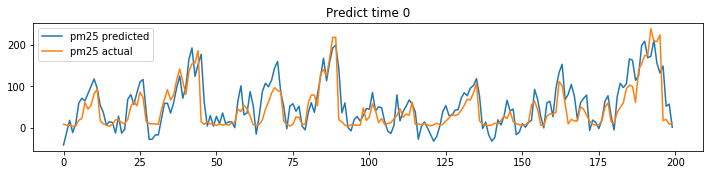

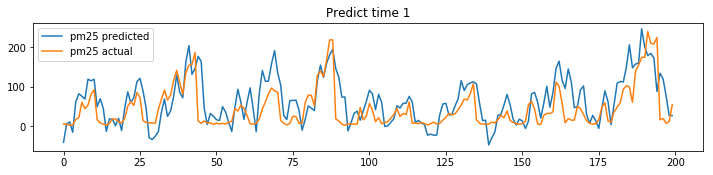

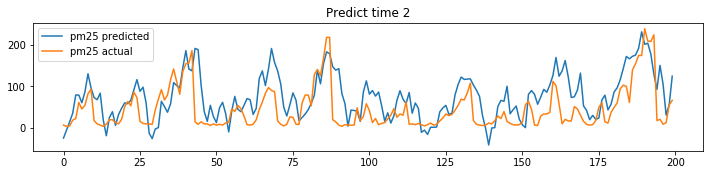

In [36]:
# Plot for linear regression
for i in range(predict_hours):
    plt.subplot(predict_hours, 1, i+1)
    plt.plot(pm25_predict_lr[-200:, i], '-', label = 'pm25 predicted')
    plt.plot(pm25_actual[-200:, i], '-', label = 'pm25 actual')
    plt.legend()
    plt.title('Predict time '+ str(i))
    plt.show()

In [24]:
t = np.tile(ypredict,(1,5))

In [167]:
train_y.shape

(2131, 1)

In [108]:
ypredict.shape

(532, 3)

In [121]:
pm25_actual.shape

(532, 3)

In [116]:
pm25_predict[:,1]

array([ 0.02512626,  0.13157386,  0.42580077,  0.01957737,  0.06231519,
        0.02118389,  0.16410474,  0.05062803,  0.07270921,  0.01696643,
        0.13278526,  0.10435077,  0.05019544,  0.17845559,  0.05315086,
        0.07699878,  0.03578535,  0.20254955,  0.00799736,  0.03828513,
        0.03645626, -0.02934895,  0.07096433,  0.05544633,  0.00306354,
       -0.00184802,  0.0489907 ,  0.045976  ,  0.08306812,  0.26169065,
        0.06274786,  0.05632127,  0.28027174,  0.06150862,  0.03163888,
        0.01078969,  0.02413501,  0.1811978 ,  0.03442261,  0.07689123,
        0.03582137,  0.11131186, -0.00857573,  0.07133815,  0.09203243,
        0.09898623,  0.04388558,  0.06305756,  0.04395104,  0.1310133 ,
        0.08464725,  0.02060915,  0.2815719 ,  0.10502711,  0.14615808,
        0.05662401,  0.06258877,  0.05891931,  0.07595711,  0.13015519,
        0.34132555,  0.04103775,  0.38648757,  0.19144152,  0.01765127,
        0.01077341,  0.23759626,  0.16167738,  0.01709972,  0.15

# LSTM implemented by PyTorch

In [21]:
import torch
from torch import nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F

import utility as util

global logger

util.setup_log()
# util.setup_path()
logger = util.logger

In [26]:
class lstm(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, logger=logger):
        super(lstm, self).__init__()
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.logger = logger
        
    def forward(self, input_data):
        #Set initial states
        h0 = torch.zeros(self.num_layers, input_data.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, input_data.size(0), self.hidden_size)
        
        #Forward propagation of RNN
        out, self.hidden = self.lstm(input_data, (h0, c0))
        
        #Decode hidden state of last time step, and followed by a fully connected layer
        out = self.fc(out[:, -1, :])

        return out


In [27]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)

(4380, 10, 21)
(1096, 10, 21)
(4380, 3)


In [45]:
class LSTM_model:
    def __init__(self, input_size, hidden_size, num_layers, output_size, lag_hours, logger,
                 learning_rate = 0.001, batch_size = 200):
        self.rnn = lstm(input_size=input_size, hidden_size=64, num_layers=1, output_size=output_size)

        # Loss and Optimizer
        self.lag_hours = lag_hours
        self.batch_size = batch_size
        self.criterion = nn.MSELoss()
        self.optimizer = torch.optim.Adam(self.rnn.parameters(), lr=learning_rate)
        
    def train_SGD(self, train_X, train_y, num_epochs = 10):
        # Train the Model
        # SGD
        for epoch in range(num_epochs):
            for i, (X, y) in enumerate(zip(train_X, train_y)):
                X_ = torch.from_numpy(X).type(torch.FloatTensor).view(-1, lag_hours, n_features)
                y_true = torch.from_numpy(y).type(torch.FloatTensor)

                # Forward + Backward + Optimize
                self.optimizer.zero_grad()
        #         logger.info("Shape of X: %s", X_.shape)
                y_pred = self.rnn(X_).squeeze()
        #         logger.info("Shape of y_pred: %s", y_pred)
                loss = self.criterion(y_pred, y_true)

        #         logger.info("Loss: %s", loss)
                loss.backward()
                optimizer.step()

                if (i+1) % 100 == 0:
                    print ('Epoch [%d/%d],  Loss: %.4f' 
                           %(epoch+1, num_epochs,  loss.data[0]))
                    print('y_pred: %.4f, y_true: %.4f'%(y_pred[0], y_true[0]))
                    
    def train_MBGD(self, train_X, train_y, num_epochs = 10):
        # mini-batch
        for epoch in range(num_epochs):
            # pick a random batch 
            rand_idx = np.random.randint(train_X.shape[0] - self.batch_size)
            X_ = torch.from_numpy(train_X[rand_idx : rand_idx + self.batch_size, :, :]).type(torch.FloatTensor)
            y_true = torch.from_numpy(train_y[rand_idx : rand_idx + self.batch_size, :]).type(torch.FloatTensor)
            # Forward + Backward + Optimize
            self.optimizer.zero_grad()
    #         logger.info("Shape of X: %s", X_.shape)
            y_pred = self.rnn(X_).squeeze()
    #         logger.info("Shape of y_pred: %s", y_pred)
            loss = self.criterion(y_pred, y_true)

    #         logger.info("Loss: %s", loss)
            loss.backward()
            self.optimizer.step()

            if (epoch+1) % 500 == 0:
                print ('Epoch [%d/%d],  Loss: %.4f' 
                       %(epoch+1, num_epochs,  loss.data[0]))
#                 print('y_pred: %.4f, y_true: %.4f'%(y_pred[0], y_true[0]))
    
    def predict(self, X):
        # Process the input data X
        X_ = torch.from_numpy(test_X).type(torch.FloatTensor)
        
        return self.rnn(X_).squeeze().detach().numpy()

# print('Test Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total)) 


In [19]:
lstm_model = LSTM_model(input_size=n_features, hidden_size=50, num_layers=1, output_size=predict_hours, lag_hours=10, learning_rate=0.001, batch_size=72, logger=logger)
lstm_model.train_MBGD(train_X, train_y, num_epochs=2000)

NameError: name 'logger' is not defined

In [29]:
lstm_model = LSTM_model(input_size=n_features, hidden_size=50, num_layers=1, output_size=predict_hours, lag_hours=10, learning_rate=0.001, batch_size=72, logger=logger)
lstm_model.train_MBGD(train_X, train_y, num_epochs=2000)
# Test the Model
y_pred = np.zeros(test_y.shape)
for i, (X, y) in enumerate(zip(test_X, test_y)):
    X_ = torch.from_numpy(X).type(torch.FloatTensor).view(-1, lag_hours, n_features)
#     logger.info("Shape of X: %s", X_.shape)
    y_pred[i] = lstm_model.rnn(X_).squeeze().detach().numpy()


/Users/luoweimeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [10/2000],  Loss: 0.0842
Epoch [20/2000],  Loss: 0.1340
Epoch [30/2000],  Loss: 0.0369
Epoch [40/2000],  Loss: 0.0615
Epoch [50/2000],  Loss: 0.0918
Epoch [60/2000],  Loss: 0.1149
Epoch [70/2000],  Loss: 0.1225
Epoch [80/2000],  Loss: 0.0652
Epoch [90/2000],  Loss: 0.0760
Epoch [100/2000],  Loss: 0.0467
Epoch [110/2000],  Loss: 0.0874
Epoch [120/2000],  Loss: 0.0511
Epoch [130/2000],  Loss: 0.1169
Epoch [140/2000],  Loss: 0.0979
Epoch [150/2000],  Loss: 0.0638
Epoch [160/2000],  Loss: 0.1356
Epoch [170/2000],  Loss: 0.0390
Epoch [180/2000],  Loss: 0.1015
Epoch [190/2000],  Loss: 0.0444
Epoch [200/2000],  Loss: 0.0472
Epoch [210/2000],  Loss: 0.0521
Epoch [220/2000],  Loss: 0.0511
Epoch [230/2000],  Loss: 0.1127
Epoch [240/2000],  Loss: 0.0382
Epoch [250/2000],  Loss: 0.0458
Epoch [260/2000],  Loss: 0.1067
Epoch [270/2000],  Loss: 0.0370
Epoch [280/2000],  Loss: 0.1022
Epoch [290/2000],  Loss: 0.0905
Epoch [300/2000],  Loss: 0.0384
Epoch [310/2000],  Loss: 0.0644
Epoch [320/2000],

In [31]:
pm25_predict_lstm = inv_normalization(scaler, y_pred, predict_hours=3)
pm25_actual = inv_normalization(scaler, test_y, predict_hours=3)

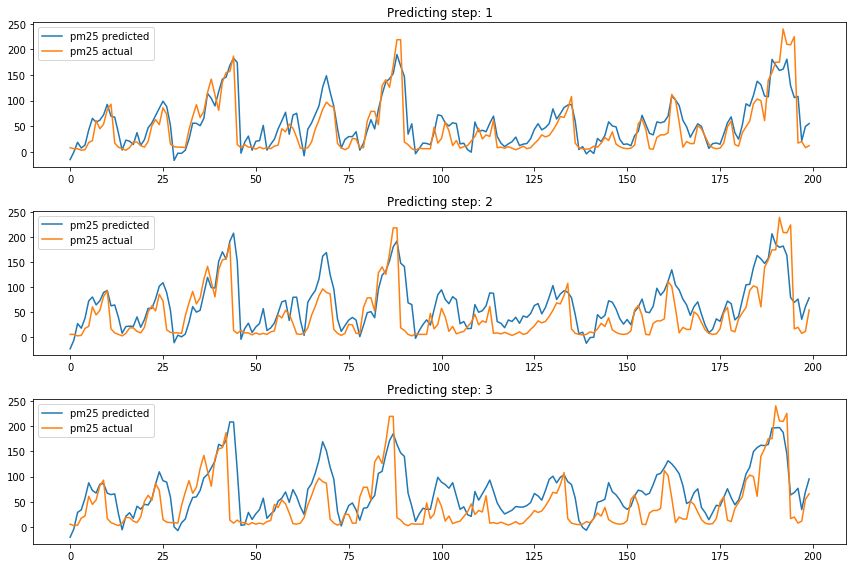

In [55]:
# Plot for LSTM
for i in range(predict_hours):
    plt.subplot(predict_hours, 1, i+1)
    plt.plot(pm25_predict_lstm[-200:, i], '-', label = 'pm25 predicted')
    plt.plot(pm25_actual[-200:, i], '-', label = 'pm25 actual')
    plt.legend()
    plt.title('Predicting step: '+ str(i+1))
plt.tight_layout()
plt.savefig("LSTM.png")

In [33]:
for i in range(predict_hours):
    print("predict_hours " + str(i))
    print("mae:")
    print(mean_absolute_error(pm25_predict_lstm[:, i], pm25_actual[:, i]))
    print("rmse:")
    print(math.sqrt(mean_squared_error(pm25_predict_lstm[:, i], pm25_actual[:, i])))
    print("mape:")
    print(mean_absolute_percentage_error(pm25_predict_lstm[:, i], pm25_actual[:, i]))

predict_hours 0
mae:
21.49914059706413
rmse:
36.09827378878922
mape:
1.0665705193840593
predict_hours 1
mae:
29.27965951051536
rmse:
45.12287646048217
mape:
0.6739128045996562
predict_hours 2
mae:
31.477116053658843
rmse:
48.30657724909808
mape:
0.6874795670062834


In [53]:
pm25_predict_lstm

array([[  7.18691928,  20.24701607,  37.60848834],
       [ -5.42624196,   1.50003192,  28.27294846],
       [ 47.96418476,  57.70452608,  66.25610329],
       ...,
       [ 35.84769479,  54.52262363,  47.3027169 ],
       [ 55.33455375,  60.51570734,  79.42688341],
       [ 53.63000761,  82.36994463, 114.27164185]])

In [46]:
#Repeat for 10 times

mae = np.zeros((10, 3))
rmse = np.zeros((10, 3))
mape = np.zeros((10, 3))
for t in range(10):
    print("times: {a:d}".format(a=t))
    lstm_model = LSTM_model(input_size=n_features, hidden_size=50, num_layers=1, output_size=predict_hours, lag_hours=10, learning_rate=0.001, batch_size=72, logger=logger)
    lstm_model.train_MBGD(train_X, train_y, num_epochs=2000)
    # Test the Model
    y_pred = np.zeros(test_y.shape)
    for i, (X, y) in enumerate(zip(test_X, test_y)):
        X_ = torch.from_numpy(X).type(torch.FloatTensor).view(-1, lag_hours, n_features)
    #     logger.info("Shape of X: %s", X_.shape)
        y_pred[i] = lstm_model.rnn(X_).squeeze().detach().numpy()

    pm25_predict_lstm = inv_normalization(scaler, y_pred, predict_hours=3)
    pm25_actual = inv_normalization(scaler, test_y, predict_hours=3)
    
    for i in range(predict_hours):
        mae[t, i] = mean_absolute_error(pm25_predict_lstm[:, i], pm25_actual[:, i])
        rmse[t, i] = math.sqrt(mean_squared_error(pm25_predict_lstm[:, i], pm25_actual[:, i]))
        mape[t, i] = mean_absolute_percentage_error(pm25_predict_lstm[:, i], pm25_actual[:, i])

times: 0


/Users/luoweimeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [500/2000],  Loss: 0.0061
Epoch [1000/2000],  Loss: 0.0101
Epoch [1500/2000],  Loss: 0.0069
Epoch [2000/2000],  Loss: 0.0303
times: 1
Epoch [500/2000],  Loss: 0.0023
Epoch [1000/2000],  Loss: 0.0082
Epoch [1500/2000],  Loss: 0.0034
Epoch [2000/2000],  Loss: 0.0064
times: 2
Epoch [500/2000],  Loss: 0.0111
Epoch [1000/2000],  Loss: 0.0078
Epoch [1500/2000],  Loss: 0.0044
Epoch [2000/2000],  Loss: 0.0032
times: 3
Epoch [500/2000],  Loss: 0.0084
Epoch [1000/2000],  Loss: 0.0054
Epoch [1500/2000],  Loss: 0.0142
Epoch [2000/2000],  Loss: 0.0141
times: 4
Epoch [500/2000],  Loss: 0.0033
Epoch [1000/2000],  Loss: 0.0028
Epoch [1500/2000],  Loss: 0.0046
Epoch [2000/2000],  Loss: 0.0100
times: 5
Epoch [500/2000],  Loss: 0.0146
Epoch [1000/2000],  Loss: 0.0029
Epoch [1500/2000],  Loss: 0.0121
Epoch [2000/2000],  Loss: 0.0116
times: 6
Epoch [500/2000],  Loss: 0.0097
Epoch [1000/2000],  Loss: 0.0079
Epoch [1500/2000],  Loss: 0.0023
Epoch [2000/2000],  Loss: 0.0138
times: 7
Epoch [500/2000],  L

In [44]:
# Loss function: MAE
print(np.mean(mae, axis=0))
print(np.std(mae, axis=0))
print(np.mean(rmse, axis=0))
print(np.std(rmse, axis=0))
print(np.mean(mape, axis=0))
print(np.std(mape, axis=0))

[20.99868958 27.49069508 30.48303848]
[0.90743704 1.83875033 2.20023799]
[35.66557907 43.9611544  48.16358967]
[1.01982586 2.10638333 2.43457053]
[0.56652129 0.64834195 0.7927619 ]
[0.23929275 0.17081264 0.3224373 ]


In [48]:
# Loss function: MSE
print(np.mean(mae, axis=0))
print(np.std(mae, axis=0))
print(np.mean(rmse, axis=0))
print(np.std(rmse, axis=0))
print(np.mean(mape, axis=0))
print(np.std(mape, axis=0))

[23.39896049 29.70181787 34.06989838]
[2.52618554 3.182736   3.7598191 ]
[37.05114882 45.1291041  50.10642588]
[2.13744675 2.57868425 3.20370296]
[1.20529758 0.84233228 0.89532756]
[0.69046321 0.29555855 0.4775481 ]


In [22]:
a[1:]

array([10.,  5., 42., ..., 20.,  8., 12.])

In [28]:
mean_absolute_percentage_error(a[:-3], a[3:])

0.9889470553436004

In [21]:
def mean_absolute_percentage_error(y_true, y_pred): 
    # y_true, y_pred = check_array(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 1

In [40]:
mean_absolute_percentage_error(pm25_predict_lstm[:, 2], pm25_actual[:, 2])

NameError: name 'pm25_predict_lstm' is not defined

In [39]:
pm25_predict_lr[:, 2][-200:]

array([-2.55769176e+01, -5.85323309e+00,  1.38307177e+01,  3.47682027e+01,
        7.90537786e+01,  7.88915956e+01,  6.02924303e+01,  8.62682687e+01,
        1.30596536e+02,  9.61890357e+01,  7.27297373e+01,  6.76407314e+01,
        8.35233287e+01,  1.81927718e+01, -1.97399183e+01,  2.41031223e+01,
        3.84787266e+01,  5.31457687e+00,  3.17777698e+01,  4.70081715e+01,
        5.99093935e+01,  5.80533024e+01,  6.63353788e+01,  9.10075614e+01,
        1.16489718e+02,  8.79647512e+01,  9.80527495e+01,  5.99829873e+01,
       -1.38770452e+01, -2.67061499e+01, -3.46652464e+00, -4.98945547e-02,
        6.38519083e+01,  5.10370127e+01,  3.72680069e+01,  5.75261958e+01,
        1.09188197e+02,  1.01908575e+02,  9.62069373e+01,  1.45195840e+02,
        1.86762969e+02,  1.41808291e+02,  1.37848012e+02,  1.92170063e+02,
        1.89254942e+02,  1.01668507e+02,  3.88937301e+01,  1.51655019e+01,
        5.40154865e+01,  2.66293812e+01,  1.19632417e+01,  4.79027662e+01,
        6.12668009e+01,  